In [1]:
import pickle
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.2)
from datasist.structdata import detect_outliers
import re
import joblib

>Arabic_stop_Word

In [2]:
strp={'شقة', 
'فيلا', 
'هاوس',
'تاون',
'توين',
'فى',
'و'
'علي'
'التجمع',
'in',
'فيو',
'م'
'في',
' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '\xa0',
 '²',
 '»',
 'Ã',
 'ã',
 '،',
 '\u061c',
  '؟', '\u200e',
 '\u200f',
 '–',
 '’',
 '“',
 '”',
 '•',
 '⁸',
 '我'}

In [3]:
with open("./vilas_state.pkl",'rb') as file:
        vilas,stack2,link2=pickle.load(file)
df=pd.DataFrame(vilas)
df.rename(columns={'data': 'date'},inplace=True, errors='raise')
df.drop(['vlaues'],axis=1,inplace=True)
df.drop(df.loc[[type(v)!=str for v in df['date']]].index,inplace=True)
df.drop(['Down Payment'],axis=1,inplace=True)
len(vilas)

21737

***Cleaning***


In [4]:
df['date']=df['date'].apply(lambda x: x.strip())
df['date']=pd.to_datetime(df['date'], format="%d %B %Y")
df['month']= pd.DatetimeIndex(df['date']).month

In [5]:
z=list(df.columns)
x=['price','location','date','title','link','viwers','negotiable','cat','month']
selected=[i for i in z if i not in x ]
selected

['Bedrooms',
 'Bathrooms',
 'Area (m²)',
 'Type',
 'Payment Option',
 'Compound',
 'Delivery Term',
 'Amenities',
 'Furnished',
 'Delivery Date']

In [6]:
for i in selected:
    print(df[i].value_counts())
    print("*"*80)

[4]      8826
[3]      4968
[5]      4224
[6]      1798
[7]       618
[10+]     536
[8]       235
[2]       168
[10]      148
[9]       135
[1]        47
Name: Bedrooms, dtype: int64
********************************************************************************
[4]      7550
[3]      6340
[5]      3637
[6]      1537
[2]      1009
[7]       632
[10+]     410
[8]       240
[1]       153
[9]        98
[10]       97
Name: Bathrooms, dtype: int64
********************************************************************************
[300]       548
[400]       504
[600]       484
[500]       469
[260]       401
           ... 
[1,375]       1
[443]         1
[609]         1
[1,301]       1
[388.78]      1
Name: Area (m²), Length: 1078, dtype: int64
********************************************************************************
[Stand, Alone, Villa]    11528
[Town, House]             5770
[Twin, House]             4405
Name: Type, dtype: int64
****************************************************

In [7]:
def xx (z):
    try:
        return ' '.join(str(e) for e in z)
    except Exception as e:
        
        return np.nan
     
for i in selected:
    df[i]=df[i].apply(xx)

In [8]:
df['Amenities']

0                                                      NaN
1        Balcony Pets Allowed Private Garden Security E...
2        Balcony Built in Kitchen Appliances Maids Room...
3                                  Private Garden Security
4        Balcony Built in Kitchen Appliances Covered Pa...
                               ...                        
21732    Private Garden Built in Kitchen Appliances Bal...
21733                                                  NaN
21734                                                  NaN
21735                                                  NaN
21736    Balcony Covered Parking Maids Room Pets Allowe...
Name: Amenities, Length: 21703, dtype: object

In [9]:
for i in selected:
    print(i)
    print(df[i].unique())
    print("*"*80)

Bedrooms
['4' '3' '5' '6' '10+' '2' '7' '8' '9' '10' '1']
********************************************************************************
Bathrooms
['4' '3' '2' '1' '6' '10+' '5' '7' '8' '9' '10']
********************************************************************************
Area (m²)
['338' '456' '245' ... '288.79' '1,251' '388.78']
********************************************************************************
Type
['Stand Alone Villa' 'Town House' 'Twin House']
********************************************************************************
Payment Option
['Cash or Installment' 'Cash' 'Installment' nan]
********************************************************************************
Compound
['Lake West' nan 'GCR' 'Hyde Park New Cairo' 'Al Rabwa' 'Rehab City'
 'EL Patio Prime' 'Madinaty' 'Village West' 'Beverly Hills' 'Villette'
 'Swan Lake' 'Sun Capital' 'Al Maqsad' 'Zizinia Gardens' 'IL Bosco'
 'EL Patio 5' 'Layan' 'Taj City' 'Al Burouj' 'Uptown Cairo' 'EL Patio 6'
 'The Pearl

In [10]:
df['Delivery Date'].value_counts()

Ready to move      11812
soon                 935
2024                 676
2025                 480
2023                 333
within 6 months      211
2022                 186
2026                 101
2027                   6
Name: Delivery Date, dtype: int64

fill_Nulls

In [11]:
def date(words):
  chars=[{'ا', 'ل', 'ن'}, {'ر', 'ف', 'و', 'ي'}, {'ا', 'ت', 'س', 'ل', 'م'}]
  x=[{x for x in i if i not in strp}for i in words.split(" ")]
  for i in x:
        if set(chars[2]).issubset(i) and re.search(r'(\d{4})',words):
                  return re.findall(r'(\d{4})',words)[0]
        if set(chars[0]).issubset(i) or set(chars[1]).issubset(i):
              return 'Ready to move'

  return np.nan
df.loc[df['Delivery Date'].isnull(),'Delivery Date']=df.loc[df['Delivery Date'].isnull(),'title'].apply(date)

In [12]:
df.loc[df['Delivery Date']=='2027','Delivery Date']='2026'

In [13]:
df.loc[df['Delivery Date'].isin(['1050',                 
'4750'  ,               
'8500' ,                
'١١٢٣' ,                
'1000' ,                
'1500' ,                
'2500' ,                  
'٢٠٢٧' ,                
'7920' ,                
'٢٠٢١']),'Delivery Date']=np.nan

In [14]:
def counter(z,sep):
    from collections import Counter
    sv=[]
    for i in z:
        for i in i.split(sep):
            if i not  in strp:
                sv.append(i)
    return dict(sorted(dict(Counter(sv)).items(), key=lambda item: item[1],reverse=True))

In [15]:
counter(df['title'],' ')

{'للبيع': 10221,
 'في': 6696,
 'كمبوند': 3087,
 'مميز': 2119,
 'بكمبوند': 1935,
 'استلام': 1731,
 'زايد': 1642,
 'التجمع': 1484,
 'بسعر': 1474,
 'sale': 1431,
 'الخامس': 1406,
 'علي': 1390,
 'هيلز': 1377,
 'for': 1375,
 'بالتقسيط': 1310,
 'موقع': 1267,
 'فوري': 1174,
 'بمقدم': 1121,
 'تشطيب': 1108,
 'الشيخ': 1086,
 'مستقلة': 1053,
 'بالم': 1041,
 'Villa': 1008,
 'على': 1004,
 'من': 1000,
 'سنوات': 965,
 'متر': 959,
 'نموذج': 952,
 'بارك': 935,
 'مستقله': 874,
 'و': 851,
 'سعر': 845,
 'م': 795,
 'لوكس': 732,
 'امتلك': 698,
 'جدا': 640,
 'ماونتن': 637,
 'سنين': 629,
 'اكتوبر': 623,
 'For': 620,
 'villa': 615,
 'مقدم': 607,
 'house': 607,
 'فورى': 607,
 'سوبر': 602,
 'جاردن': 594,
 'Sale': 587,
 'كورنر': 561,
 'ميفيدا': 534,
 'Twin': 529,
 'الجديدة': 526,
 'مدينتي': 504,
 'بجوار': 497,
 'هايد': 489,
 '8': 487,
 'فقط': 485,
 'Standalone': 480,
 'view': 468,
 '6': 462,
 'بمدينتي': 450,
 'الشروق': 449,
 'سيتي': 441,
 'لقطه': 434,
 'hills': 432,
 'ع': 428,
 '2': 427,
 'لقطة': 421,
 'بدون': 41

In [16]:
chars=[{'ا','س','ت','ل','م'},{'ش','ا','ط','ب'},{'ق' ,'س','ط'},{'ك','ش','ا'}]
for  i in chars:
    print(i)

{'س', 'ت', 'ل', 'م', 'ا'}
{'ا', 'ط', 'ب', 'ش'}
{'س', 'ط', 'ق'}
{'ك', 'ا', 'ش'}


In [17]:
df['Compound']=df['Compound'].fillna('not_in_Compound')
Compound=df['Compound'].unique().tolist()
st=set()
for i in df[df['Compound'].isnull()]['location']:
    for x in Compound:
        if type(x) != float and x in i:
            st.add(i)
            continue 
st=list(st)

In [18]:
def x(z):
    if z['location']in st and pd.isnull(z['Compound']):
        return z['location'].split('،')[0]
    else:
        return np.nan
df.loc[df['Compound'].isnull(),'Compound']=df.apply(x,axis=1)

In [19]:
def cash_extractor(words):
  if pd.notnull(words) or pd.notna(words):
    chars=[{'ق' ,'س','ط'},{'م','ق','د'}]
    x=[{x for x in i if i not in strp}for i in words.split(" ")]
    for i in x:
          if set(chars[0]).issubset(i) or set(chars[1]).issubset(i):
                return 'Installment'
    return 'Cash'
  else:
    return np.nan
df.loc[df['Payment Option'].isnull(),'Payment Option']=df.loc[df['Payment Option'].isnull(),'title'].apply(cash_extractor)

In [20]:
def extr(i):      
      if 'نص' in i and 'شطيب' in i or 'متشطب'in i:
        return 'Semi Finished'
      elif 'شطيب' in i or 'متشطب'in i  and ('سوبر' in i or 'فرش' in i or 'مفتاح' in i or 'كامل' in i or  'لوكس'in i or 'الترا'in i or'مميز' in i or'ممتاز' in i or'راقي' in i):
             return 'Finished' 
df[df['Delivery Term'].isnull()]['Delivery Term']=df[df['Delivery Term'].isnull()]['title'].apply(extr)

C:\Users\Moham\AppData\Local\Temp\ipykernel_23004\780014698.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Delivery Term'].isnull()]['Delivery Term']=df[df['Delivery Term'].isnull()]['title'].apply(extr)


In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df[['Delivery Date','Delivery Term']] = imputer.fit_transform(df[['Delivery Date','Delivery Term']])


In [22]:
imputer = SimpleImputer(strategy='most_frequent')
df['Furnished'] = imputer.fit_transform(df[['Furnished']])

In [23]:
df['Furnished']=df['Furnished'].map({'No':0,'Yes':1})

In [24]:
df['Compound']=df['Compound'].fillna('not')

>clean_numrical_columns

In [25]:
def x(z):
    if z=='10+':
            return 10
    else:  
        try:
            return int(z)
        except Exception as e:
            print(e)
            return z
    
df['Bathrooms']=df['Bathrooms'].apply(x)
df['Bedrooms']=df['Bedrooms'].apply(x)

In [26]:
def x(z):
    try:
        x=''
        if type(z)==str: 
            for i in z:
                if  i.isdigit():
                    x+=i
            return int(x)
        elif type(z)==list:
            print(z,'list')
            for i in z[0]:
                if i.isdigit():
                    x+=i
            return int(x)
        else:
            return np.nan
    except:
        return np.nan
df['price']=         df['price'].apply(x)
df['Area (m²)']=     df['Area (m²)'].apply(x)
df['Area (m²)']=     df['Area (m²)'].astype(int)
df['negotiable'] =   df['negotiable'].astype(int)
df['viwers'] =       df['viwers'].astype(int)

In [27]:
def x(z):
    try:
        x=''
        if type(z)==str: 
            for i in z:
                if  i.isdigit():
                    x+=i
            return int(x)
        elif type(z)==list:
            print(z,'list')
            for i in z[0]:
                if i.isdigit():
                    x+=i
            return int(x)
        else:
            return np.nan
    except:
        return np.nan
x('EGP 7,400,000')

7400000

In [28]:
df['meter_price']=round(df['price']/df['Area (m²)'],2)

***Feature Engineering***

In [29]:
rows=['Parking', 'Landline', 'A/C', 'Gas', 'Security', 'Water', 'Elevator', 'Pool','Pets', 'Kitchen', 'Maids', 'Electricity', 'Garden', 'Balcony']
df[rows]=[0 for i in range(len(rows))]

In [30]:
def xvc(z):
    c={'in', 'Appliances', 'heating', 'Private', 'Covered','Central', 'Room', 'Allowed', '&', 'Meter','Built'}
    
    m=['Parking', 'Landline', 'A/C', 'Gas', 'Security', 'Water', 'Elevator', 'Pool','Pets', 'Kitchen', 'Maids', 'Electricity', 'Garden', 'Balcony']
    try:
        if z==np.nan:
            z=pd.Series([np.nan for i in m ])
            return z
        xxx=[]
        if type(z)==str:
            z=set(z.split())
            z= z ^ c
            for i in m:
                if i in z:
                    xxx.append(1)
                else:
                    xxx.append(0)
            return pd.Series(xxx)

        else:
            xxx=[np.nan for i in m ]
            return pd.Series(xxx)
    except Exception as e:
        print(e)
        xxx=[np.nan for i in m ]
        return pd.Series(xxx)   
df[rows]=df['Amenities'].apply(xvc)

In [31]:
df.loc[df['Amenities'].isnull(),rows]=[0 for i in range(len(rows))] 

In [32]:
df.shape

(21703, 33)

>categorical outliers

In [33]:
cat_outliers=[]
for k,v in df['location'].value_counts().items():
    if v <10:
        cat_outliers.append(k)
df.drop(df[df['location'].isin(cat_outliers)].index,inplace=True)

In [34]:
cat_outliers=[]
for k,v in df['Compound'].value_counts().items():
    if v<10:
        print(v)
        cat_outliers.append(k)
df.drop(df[df['location'].isin(cat_outliers)].index,inplace=True)

9
9
9
9
9
9
9
9
9
9
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [35]:
cat_outliers=[]
for k,v in df['Compound'].value_counts().items():
    if v <10:
        cat_outliers.append(k)
df.drop(df[df['Compound'].isin(cat_outliers)].index,inplace=True)

In [36]:
for  i in ['Bedrooms','Bathrooms' ,'Delivery Date']:
    cat_outliers=[]
    for k,v in df[i].value_counts().items():
        if v <105:
            cat_outliers.append(k)
        df.drop(df[df[i].isin(cat_outliers)].index,inplace=True)

In [37]:
for  i in ['Bedrooms','Bathrooms' ,'Delivery Date']:
    cat_outliers=[]
    print(df[i].value_counts())

4     8502
3     4691
5     4013
6     1644
10     597
7      568
8      198
2      102
9       95
Name: Bedrooms, dtype: int64
4     7243
3     6066
5     3487
6     1441
2      878
7      598
10     477
8      220
Name: Bathrooms, dtype: int64
Ready to move      17741
soon                 889
2024                 644
2025                 469
2023                 311
within 6 months      187
2022                 169
Name: Delivery Date, dtype: int64


In [38]:
df.drop('title',inplace=True,axis=1)
df.drop('link',inplace=True,axis=1)

In [39]:
df.reset_index(drop=True, inplace=True)

In [40]:
df.isnull().sum()

price                0
location             0
date                 0
viwers               0
negotiable           0
Bedrooms             0
Bathrooms            0
Area (m²)            0
Type                 0
Payment Option       0
Compound             0
Delivery Term        0
Amenities         5514
Furnished            0
Delivery Date        0
month                0
meter_price          0
Parking              0
Landline             0
A/C                  0
Gas                  0
Security             0
Water                0
Elevator             0
Pool                 0
Pets                 0
Kitchen              0
Maids                0
Electricity          0
Garden               0
Balcony              0
dtype: int64

<AxesSubplot:xlabel='Area (m²)'>

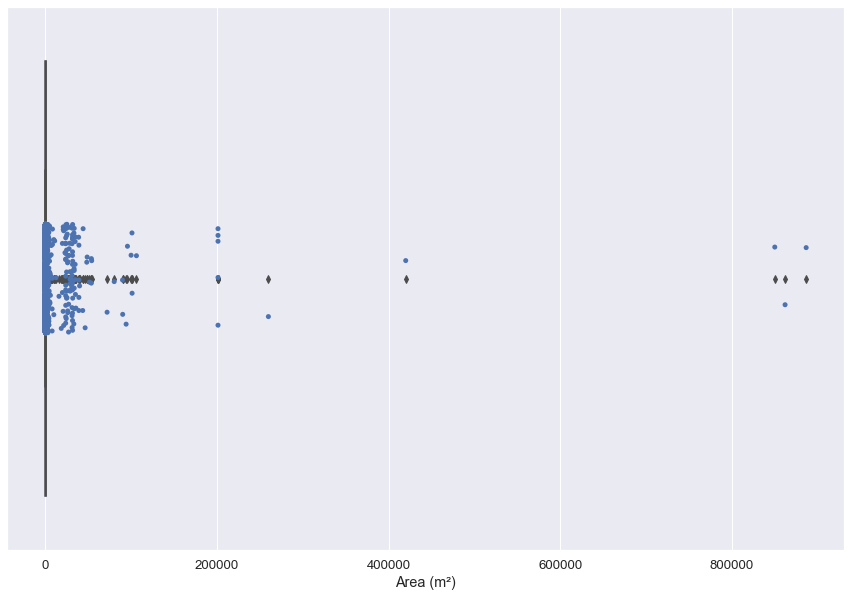

In [41]:
sns.boxplot(x="Area (m²)", data=df)
sns.stripplot(x="Area (m²)", data=df)

In [42]:
for i in ['Bathrooms','Bedrooms']:
    df[i]=df[i].astype(int)

clean bussines outliers


In [43]:
idx = ["price",'Area (m²)']
outliers_indices = detect_outliers(df, 0, idx)
df.drop(outliers_indices,inplace=True,axis=0)
len(outliers_indices)

2022

<AxesSubplot:xlabel='price'>

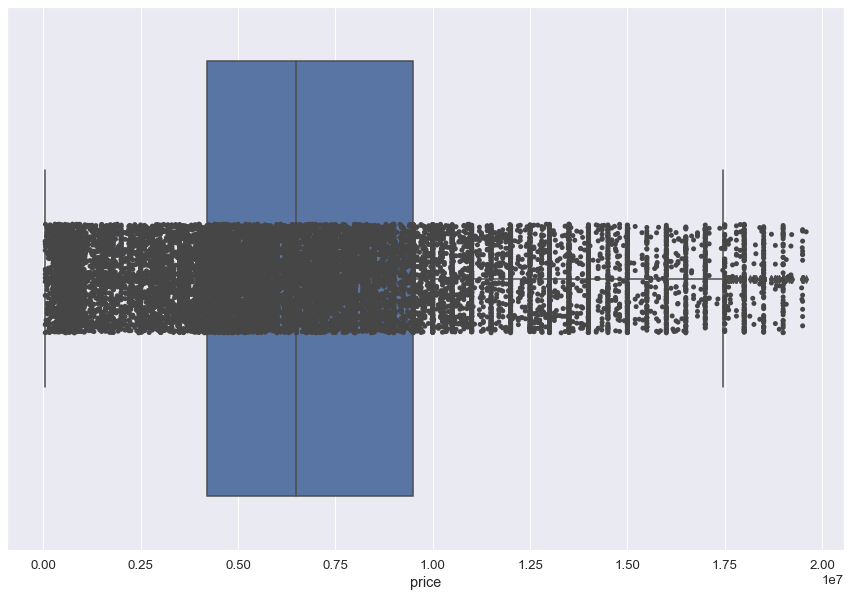

In [44]:
sns.boxplot(x="price", data=df)
sns.stripplot(x="price", data=df, color="#474646")

<AxesSubplot:xlabel='Area (m²)', ylabel='price'>

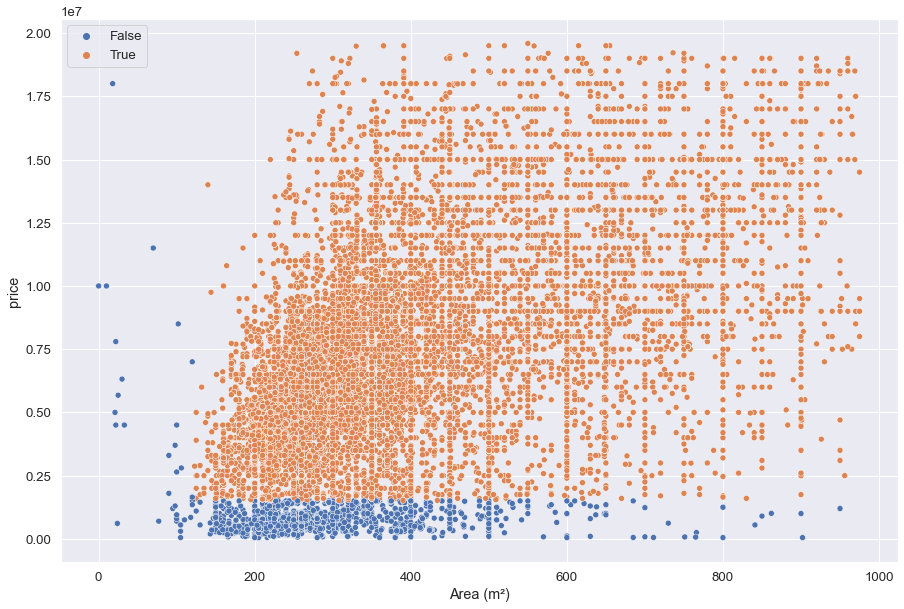

In [45]:
upper=20_000_000
lower=1500_000
upper_a=1500
lower_a=120
flt_p=((df['price']<upper) & (df['price']>lower))
flt_a=(df['Area (m²)']>lower_a) & (df['Area (m²)']<upper_a)
sns.scatterplot(x="Area (m²)",y='price', data=df, hue=flt_a & flt_p)

In [46]:
df=df[((df['price']<upper) & (df['price']>lower)) & (df['Area (m²)']>lower_a) & (df['Area (m²)']<upper_a)]

In [47]:
outliers_indices = detect_outliers(df, 0, idx)
len(outliers_indices)

709

In [48]:
for i in ['Type', 'Payment Option', 'Compound','location','Delivery Term','Delivery Date','Furnished']:
    df[i].unique()
    for x in df[i].unique():
        print(f'<option value="{x}">{x}</option>')
    print('************************************')

<option value="Stand Alone Villa">Stand Alone Villa</option>
<option value="Twin House">Twin House</option>
<option value="Town House">Town House</option>
************************************
<option value="Cash or Installment">Cash or Installment</option>
<option value="Cash">Cash</option>
<option value="Installment">Installment</option>
************************************
<option value="Lake West">Lake West</option>
<option value="not_in_Compound">not_in_Compound</option>
<option value="Hyde Park New Cairo">Hyde Park New Cairo</option>
<option value="Al Rabwa">Al Rabwa</option>
<option value="Rehab City">Rehab City</option>
<option value="EL Patio Prime">EL Patio Prime</option>
<option value="Madinaty">Madinaty</option>
<option value="Village West">Village West</option>
<option value="Beverly Hills">Beverly Hills</option>
<option value="Villette">Villette</option>
<option value="Swan Lake">Swan Lake</option>
<option value="Sun Capital">Sun Capital</option>
<option value="Zizinia Gar

In [49]:
df.columns

Index(['price', 'location', 'date', 'viwers', 'negotiable', 'Bedrooms',
       'Bathrooms', 'Area (m²)', 'Type', 'Payment Option', 'Compound',
       'Delivery Term', 'Amenities', 'Furnished', 'Delivery Date', 'month',
       'meter_price', 'Parking', 'Landline', 'A/C', 'Gas', 'Security', 'Water',
       'Elevator', 'Pool', 'Pets', 'Kitchen', 'Maids', 'Electricity', 'Garden',
       'Balcony'],
      dtype='object')

In [50]:
z=['Parking','Landline','A/C','Gas','Security','Water','Elevator','Pool','Pets','Kitchen','Maids','Electricity','Garden','Balcony']

x=['Private Garden', 'Natural Gas', 'Water Meter', 'Central A/C & heating', 'Built in Kitchen Appliances', 'Landline', 'Balcony', 'Security', 'Electricity Meter', 'Pool', 'Elevator', 'Pets Allowed', 'Maids Room', 'Covered Parking']
cx={}
for i in z:
    for c in  x:
        if i in c:
            cx[i]=c
cx

len(z),len(x)
cx
for  k,v in cx.items():
    print(f'<div class="form-check form-check-inline"> \n <input class="form-check-input" name="{k}"type="checkbox" id="{k}" value="{k}">\n<label class="form-check-label" for="{k}">{v}</label> \n </div>')

<div class="form-check form-check-inline"> 
 <input class="form-check-input" name="Parking"type="checkbox" id="Parking" value="Parking">
<label class="form-check-label" for="Parking">Covered Parking</label> 
 </div>
<div class="form-check form-check-inline"> 
 <input class="form-check-input" name="Landline"type="checkbox" id="Landline" value="Landline">
<label class="form-check-label" for="Landline">Landline</label> 
 </div>
<div class="form-check form-check-inline"> 
 <input class="form-check-input" name="A/C"type="checkbox" id="A/C" value="A/C">
<label class="form-check-label" for="A/C">Central A/C & heating</label> 
 </div>
<div class="form-check form-check-inline"> 
 <input class="form-check-input" name="Gas"type="checkbox" id="Gas" value="Gas">
<label class="form-check-label" for="Gas">Natural Gas</label> 
 </div>
<div class="form-check form-check-inline"> 
 <input class="form-check-input" name="Security"type="checkbox" id="Security" value="Security">
<label class="form-check-labe

<AxesSubplot:xlabel='price'>

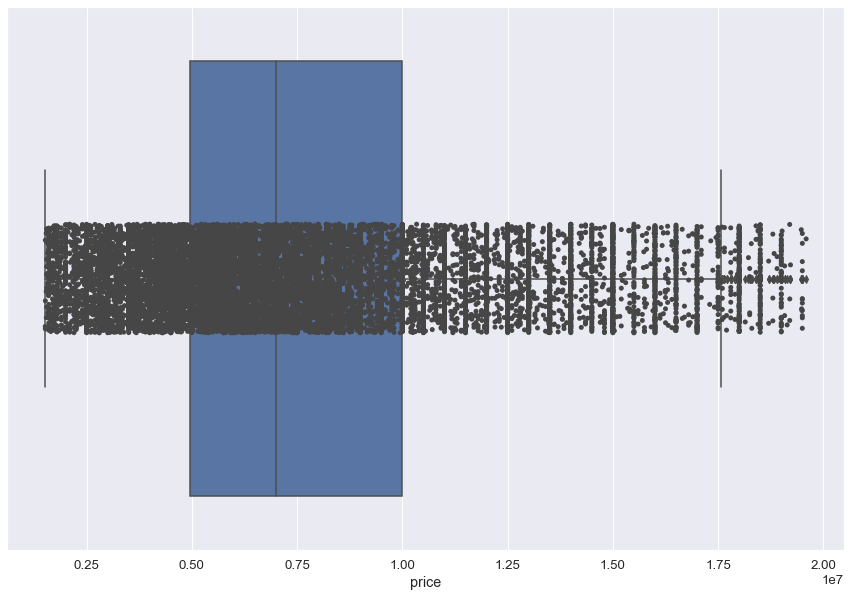

In [51]:
sns.boxplot(x="price", data=df)
sns.stripplot(x="price", data=df, color="#474646")

In [52]:
df.reset_index(drop=True, inplace=True)

sss

>> what is the most common type of villas

<AxesSubplot:xlabel='Type', ylabel='count'>

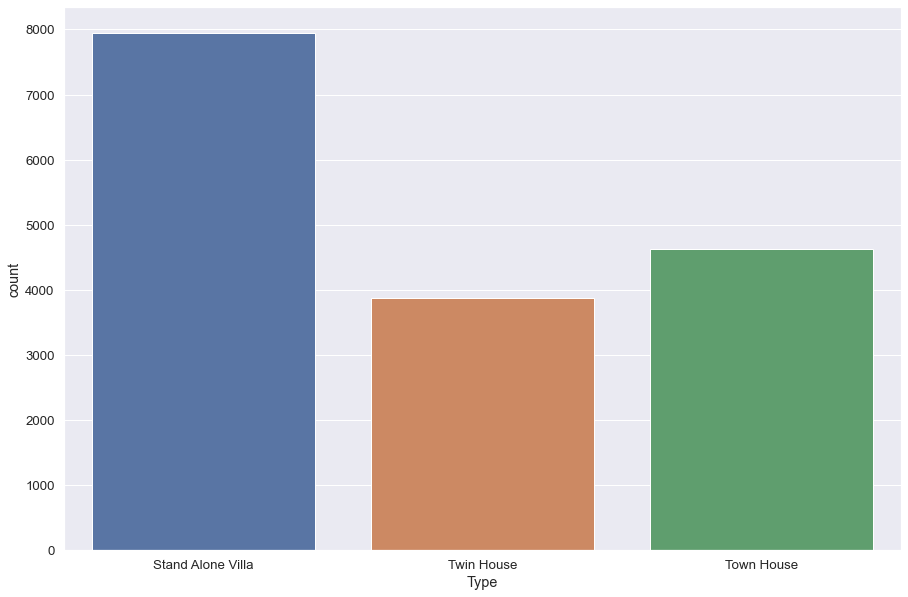

In [53]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","cat","Delivery Term","Delivery Date","Payment Option","negotiable"]
sns.countplot(x='Type', data=df)


>**is Stand Alone Villa**

>>what is the most common structure for the villas

<AxesSubplot:xlabel='Type', ylabel='count'>

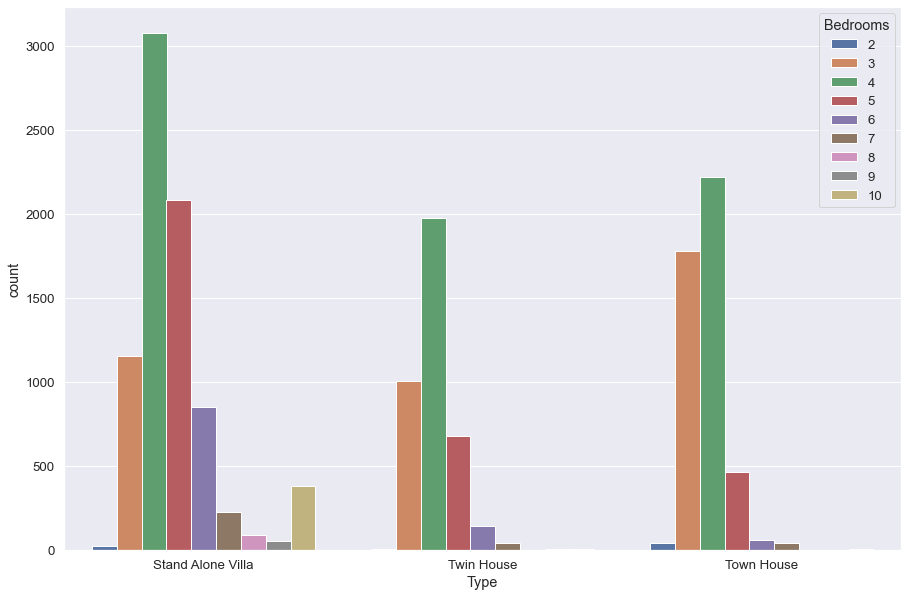

In [54]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","cat","Delivery Term","Delivery Date","Payment Option","negotiable"]
sns.countplot(x='Type', data=df ,hue="Bedrooms")


<AxesSubplot:xlabel='Type', ylabel='count'>

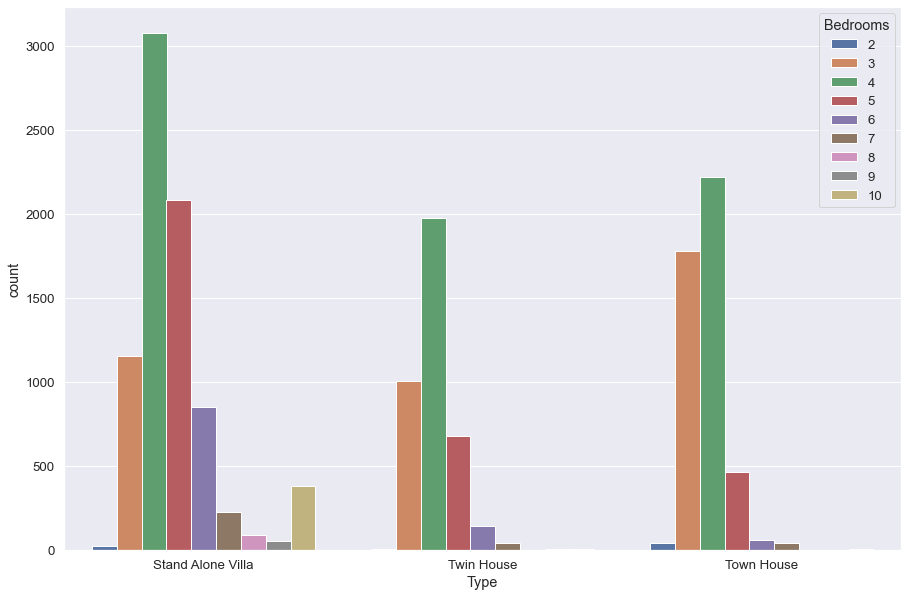

In [55]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","cat","Delivery Term","Delivery Date","Payment Option","negotiable"]
sns.countplot(x='Type', data=df ,hue="Bedrooms")


<AxesSubplot:xlabel='Type', ylabel='count'>

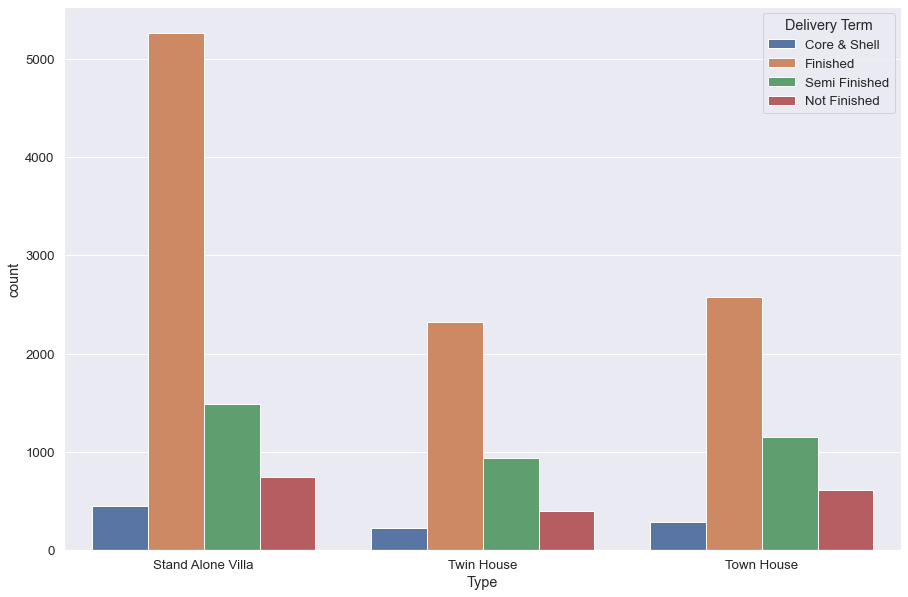

In [56]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","cat","Delivery Term","Delivery Date","Payment Option","negotiable"]
sns.countplot(x='Type', data=df ,hue="Delivery Term")


<AxesSubplot:xlabel='Type', ylabel='count'>

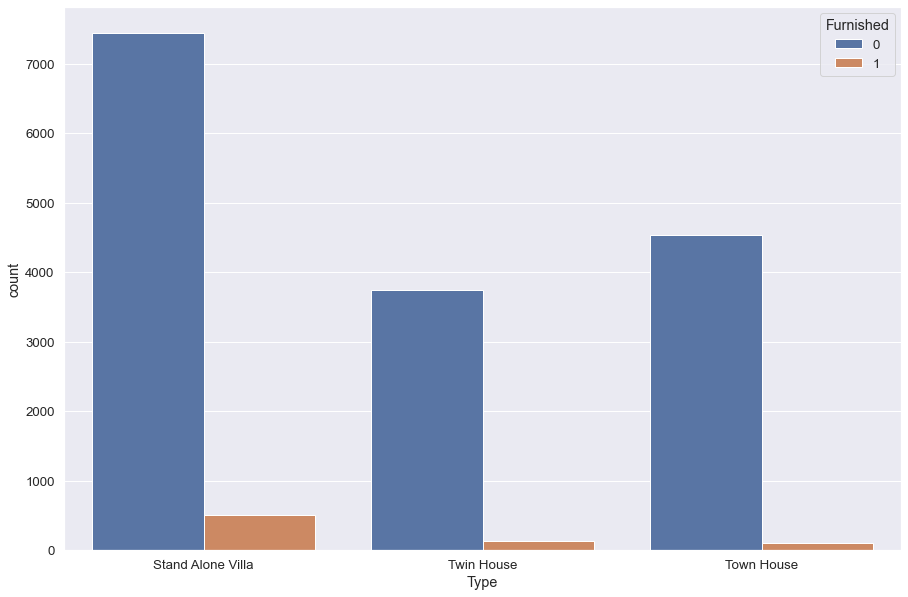

In [57]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","Delivery Term","Delivery Date","Payment Option"]
sns.countplot(x='Type', data=df ,hue="Furnished")


Finished         0.617633
Semi Finished    0.217766
Not Finished     0.106514
Core & Shell     0.058087
Name: Delivery Term, dtype: float64


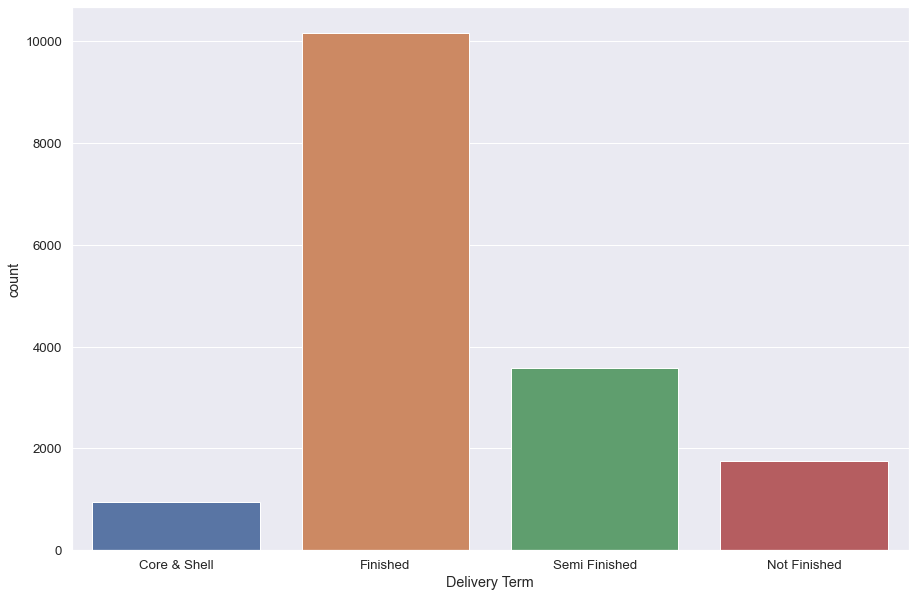

Ready to move      0.865293
soon               0.038218
2024               0.034148
2025               0.025520
2023               0.017074
within 6 months    0.010512
2022               0.009236
Name: Delivery Date, dtype: float64


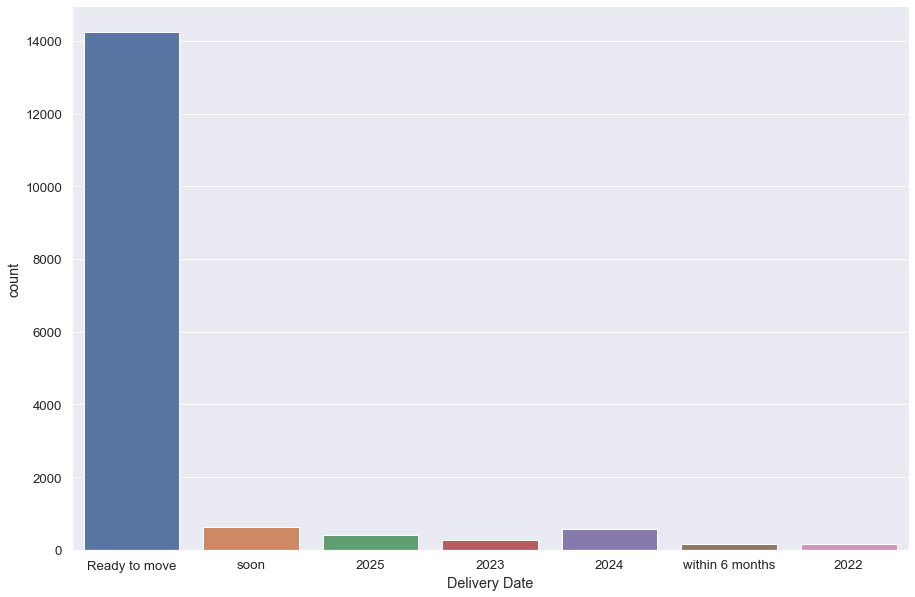

Cash                   0.626929
Cash or Installment    0.224146
Installment            0.148925
Name: Payment Option, dtype: float64


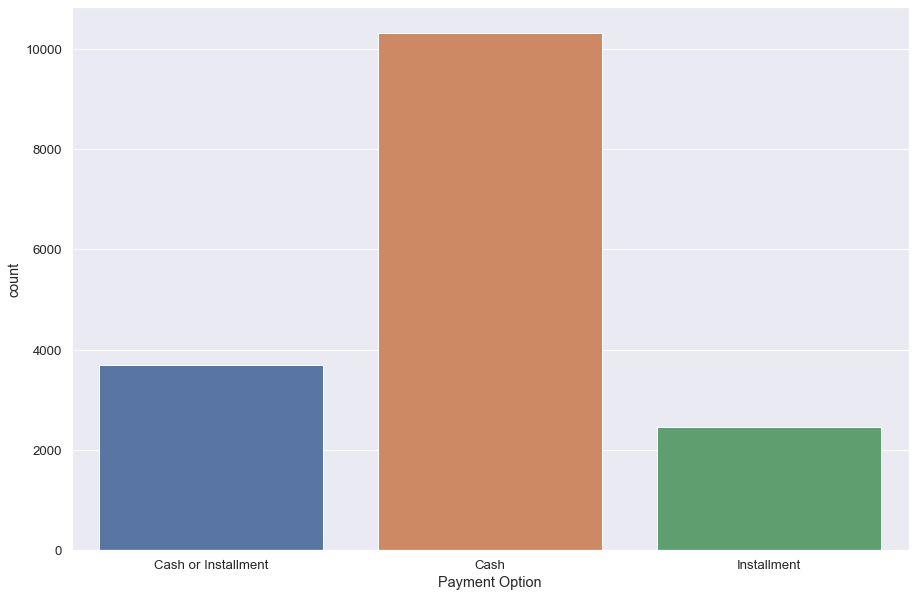

In [58]:
for i in catgorical_columns[4:]:
    temp_series = df[i].value_counts(normalize = True)
    print(temp_series)
    sns.countplot(x=i, data=df)
    plt.show()

<AxesSubplot:>

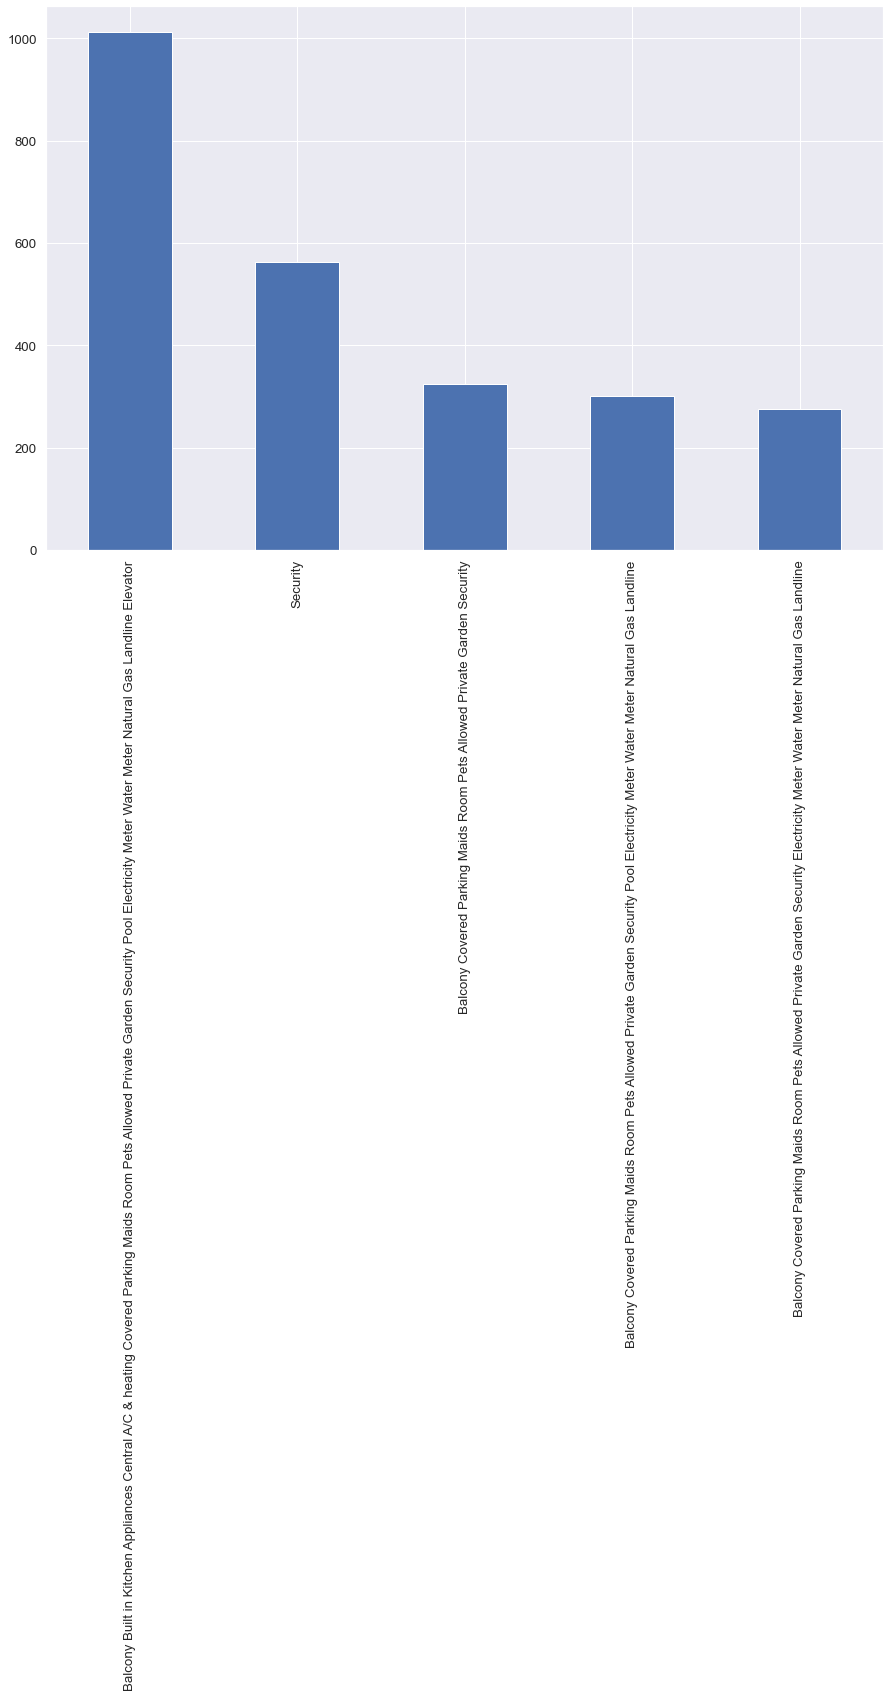

In [59]:
df['Amenities'].value_counts().head(5).plot(kind = 'bar')

>> what is the ratio for each Amenity in Amenities

0.0    0.513671
1.0    0.486329
Name: Parking, dtype: float64


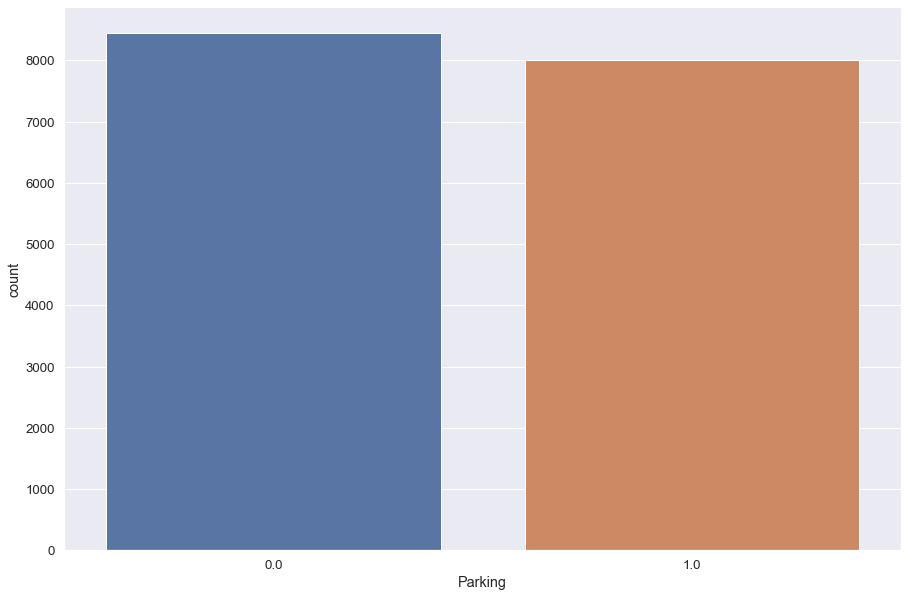

0.0    0.631729
1.0    0.368271
Name: Landline, dtype: float64


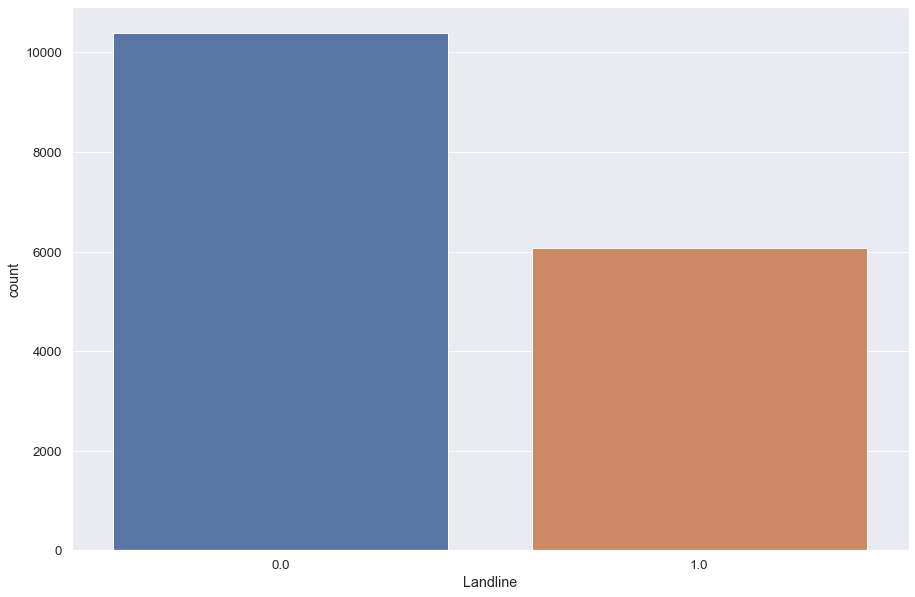

0.0    0.76036
1.0    0.23964
Name: A/C, dtype: float64


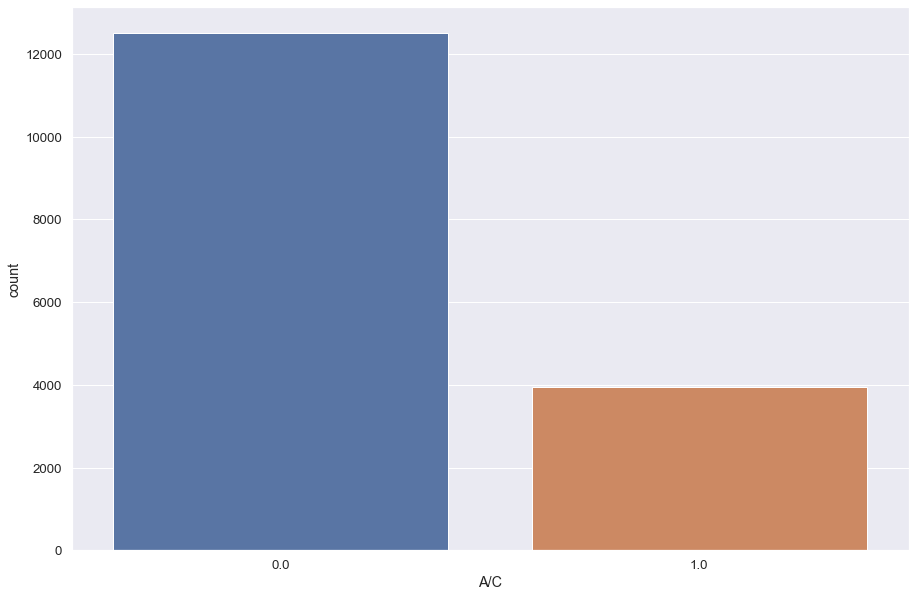

0.0    0.571151
1.0    0.428849
Name: Gas, dtype: float64


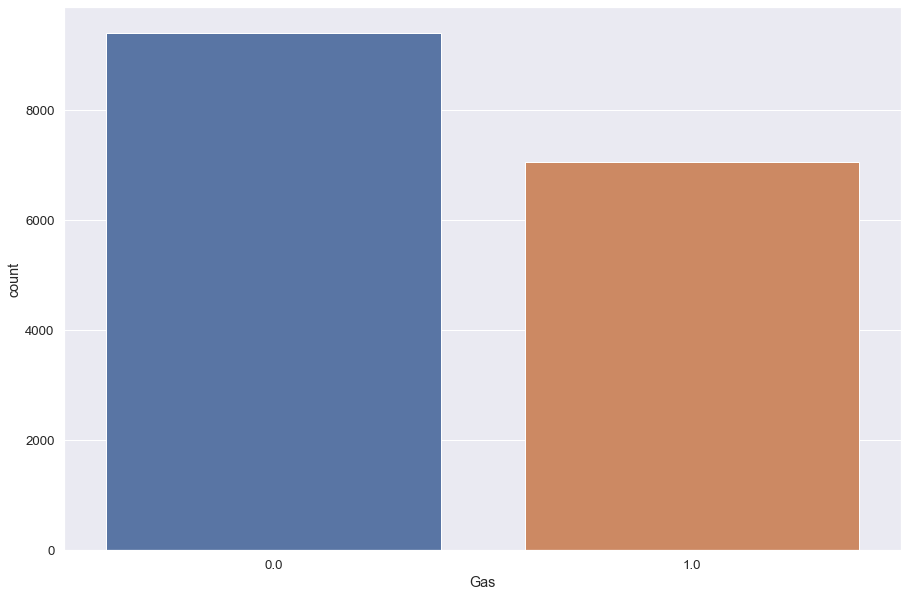

1.0    0.663021
0.0    0.336979
Name: Security, dtype: float64


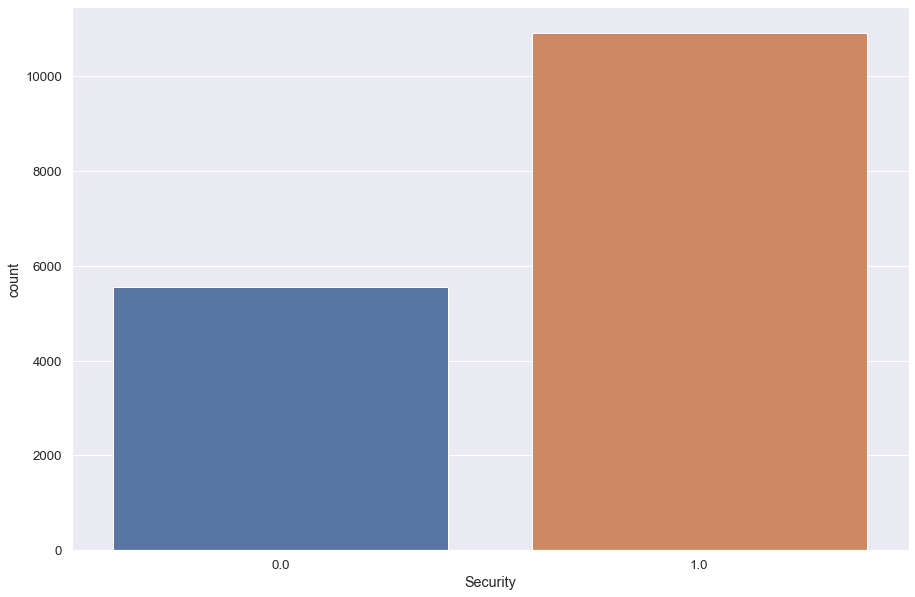

0.0    0.510633
1.0    0.489367
Name: Water, dtype: float64


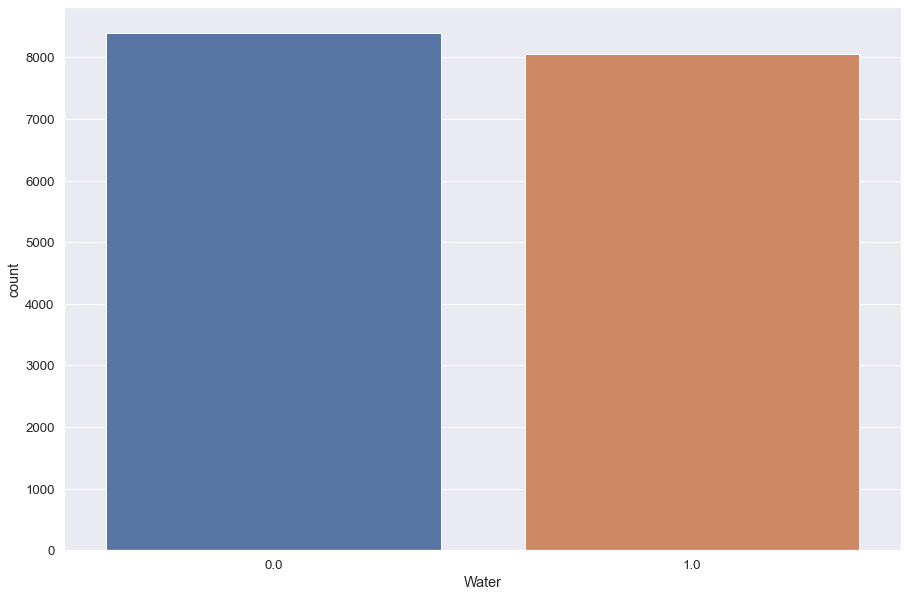

0.0    0.839774
1.0    0.160226
Name: Elevator, dtype: float64


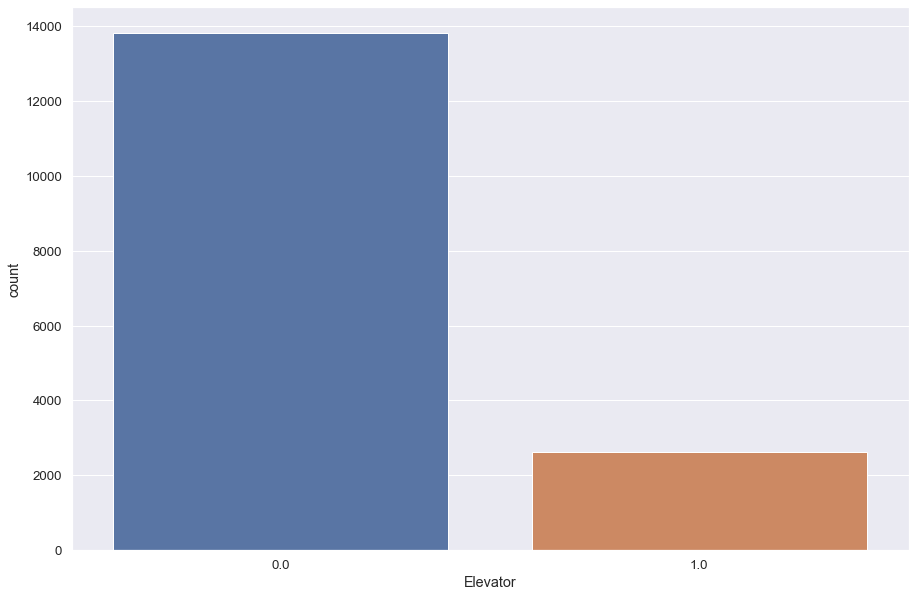

0.0    0.713939
1.0    0.286061
Name: Pool, dtype: float64


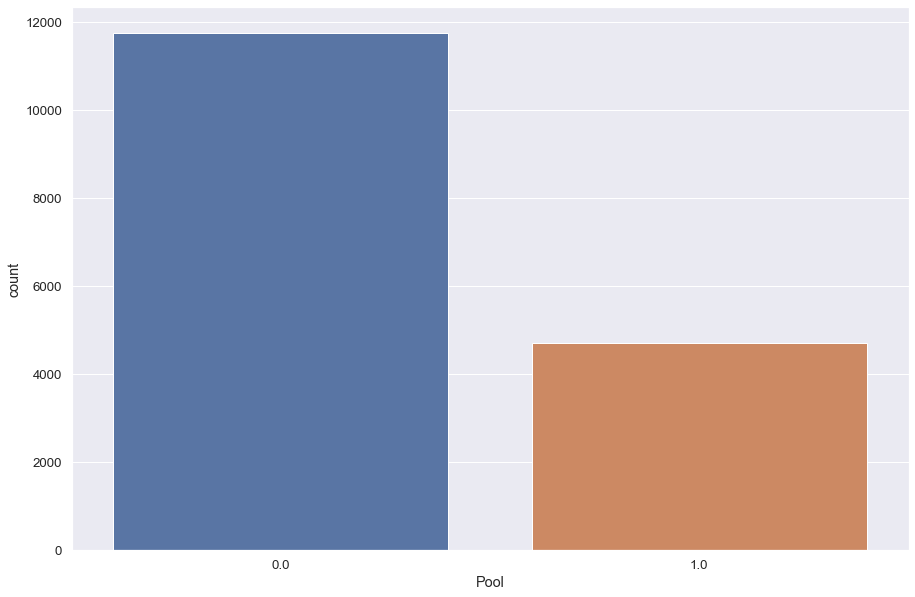

1.0    0.570725
0.0    0.429275
Name: Pets, dtype: float64


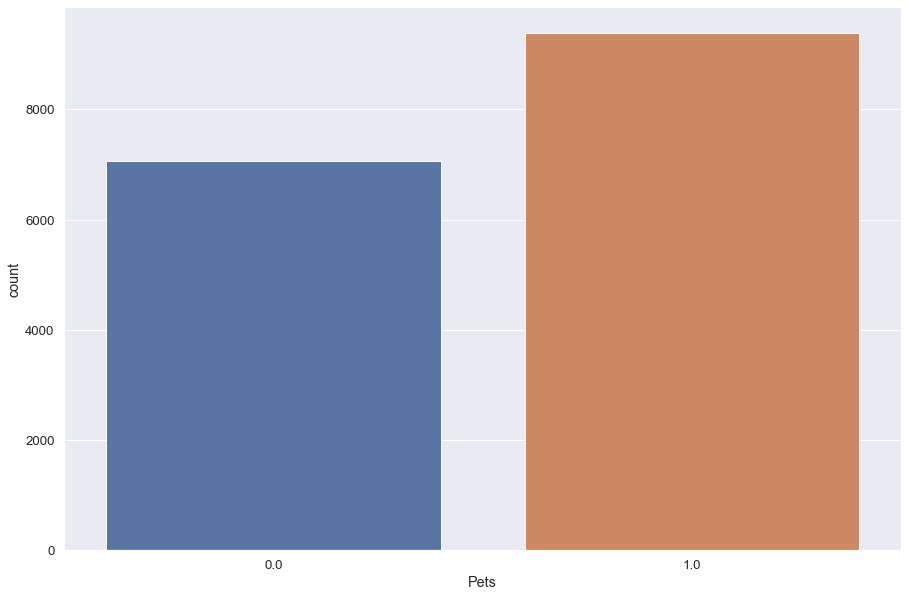

0.0    0.809029
1.0    0.190971
Name: Kitchen, dtype: float64


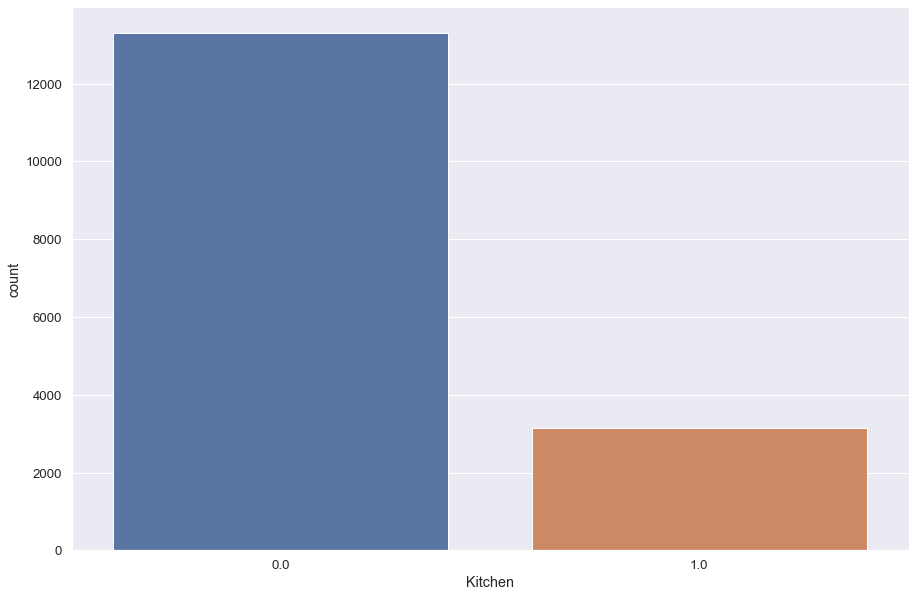

0.0    0.506501
1.0    0.493499
Name: Maids, dtype: float64


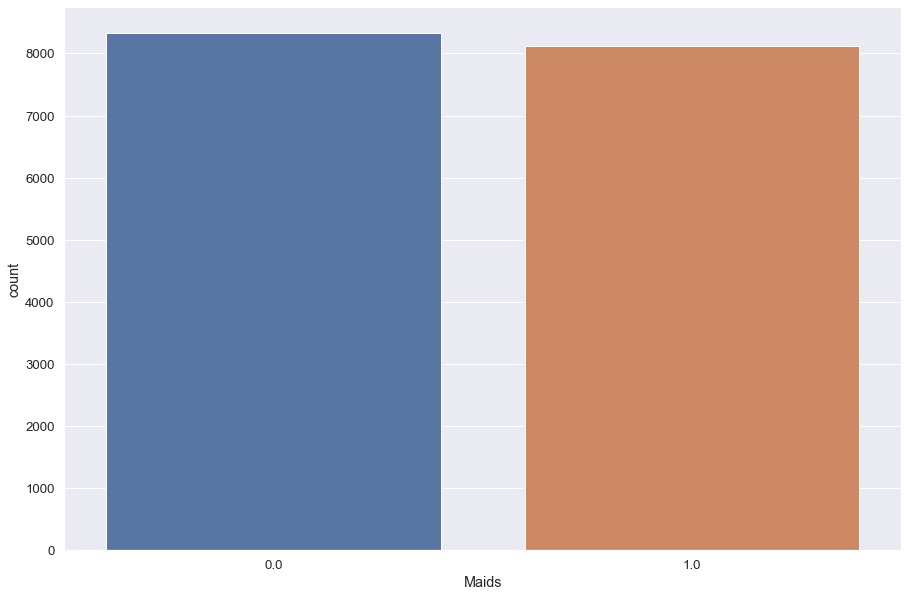

0.0    0.520355
1.0    0.479645
Name: Electricity, dtype: float64


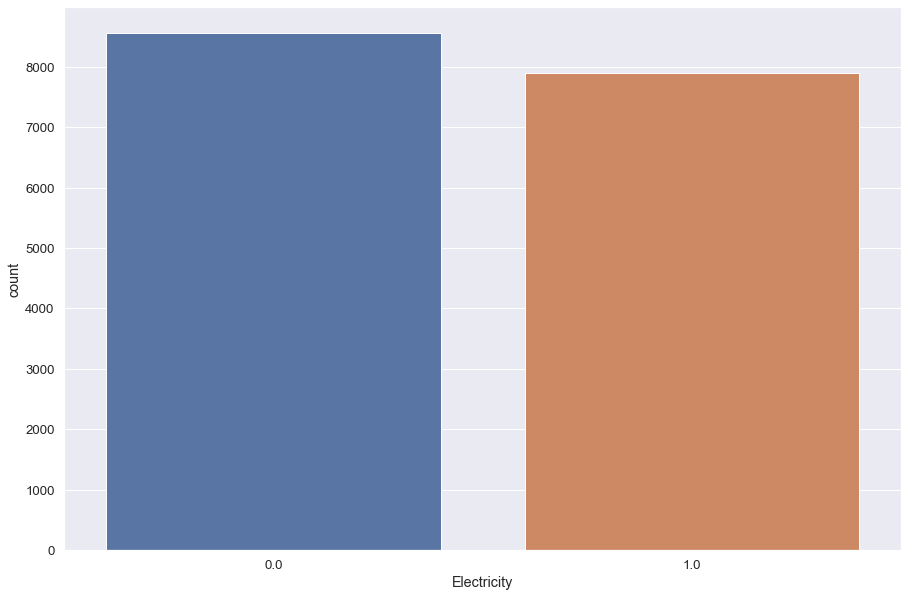

1.0    0.604326
0.0    0.395674
Name: Garden, dtype: float64


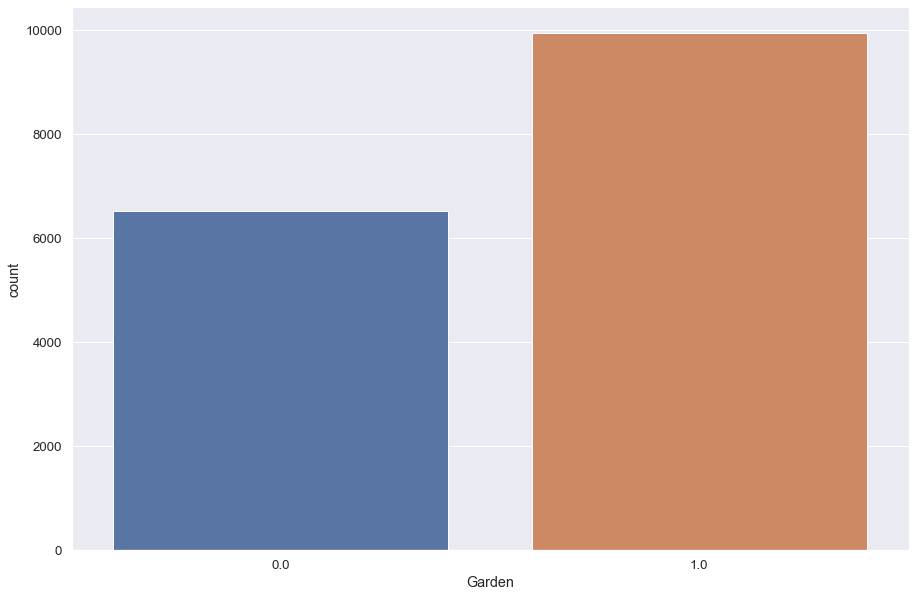

1.0    0.621582
0.0    0.378418
Name: Balcony, dtype: float64


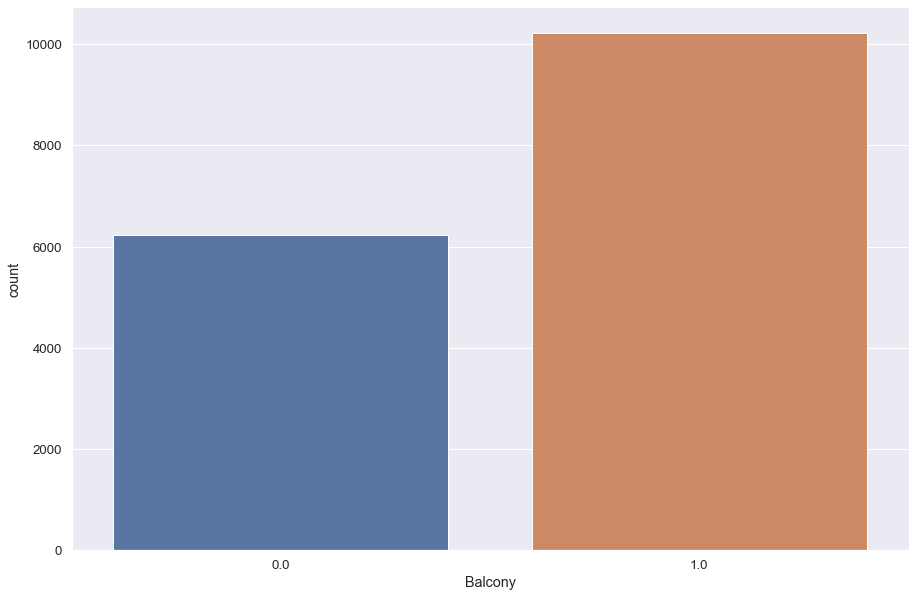

In [60]:
for i in rows:
    temp_series = df[i].value_counts(normalize = True)
    print(temp_series)
    sns.countplot(x=i, data=df)
    plt.show()

>**the most common structure for the villas is**<br>
>4 bedRooms<br>
>4 bathRooms<br>
>semi finished<br>
>**The most common Amenity is security**<br>
>**the most common Amenities for the villas is**<br>
>-Balcony Built in Kitchen Appliances Central A/C & heating Covered Parking Maids Room Pets Allowed Private Garden Security Pool Electricity Meter Water Meter Natural Gas Landline Elevator<br>

>****Bivariate****

In [61]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","Delivery Term","Delivery Date","Payment Option","negotiable"]
df['Bedrooms']=df['Bedrooms'].astype('category')
df['Bathrooms']=df['Bathrooms'].astype('category')
df['Furnished']=df['Furnished'].astype('category')
df['negotiable']=df['negotiable'].astype('category')

>the value that appears most  in  the dataframe


In [62]:
df.mode(axis=0, numeric_only=False, dropna=True)


,price,location,date,viwers,negotiable,Bedrooms,Bathrooms,Area (m²),Type,Payment Option,...,Security,Water,Elevator,Pool,Pets,Kitchen,Maids,Electricity,Garden,Balcony
0,6500000,New Cairo - El Tagamoa، Cairo,2022-03-10,14,0,4,4,300,Stand Alone Villa,Cash,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


>-***so I need to measure the average price for each category in categorical columns to see how the design affects the price and select the best design to recommend to real state companies***<br>
>-***and see if the most common strucure avrage cost***<br>
>-***Let's see where public taste is heading***



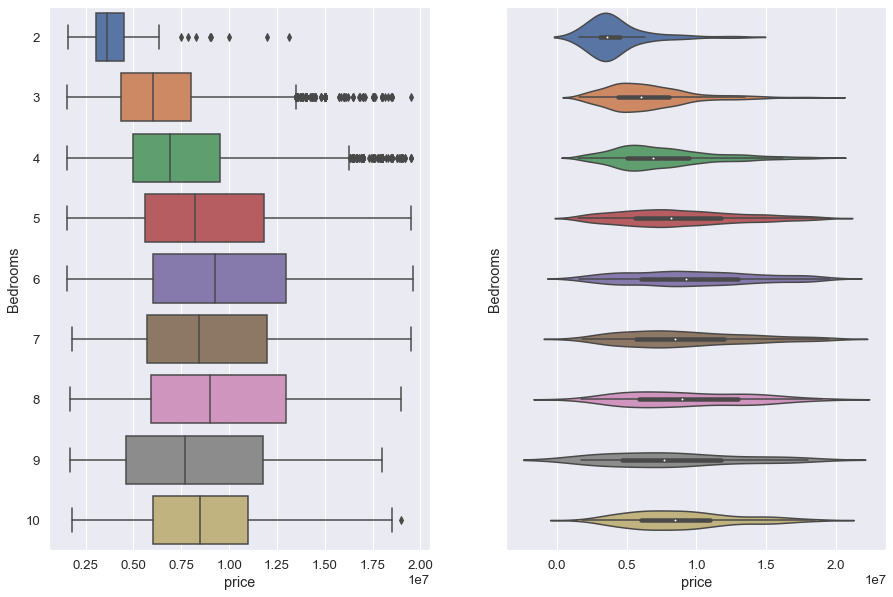

             Mean   Median
Bedrooms                  
2         4222679  3600000
3         6508598  6000000
4         7603313  6900000
5         8857506  8200000
6         9663882  9250000
7         9156712  8435000
8         9341800  9000000
9         8265978  7700000
10        8986659  8500000


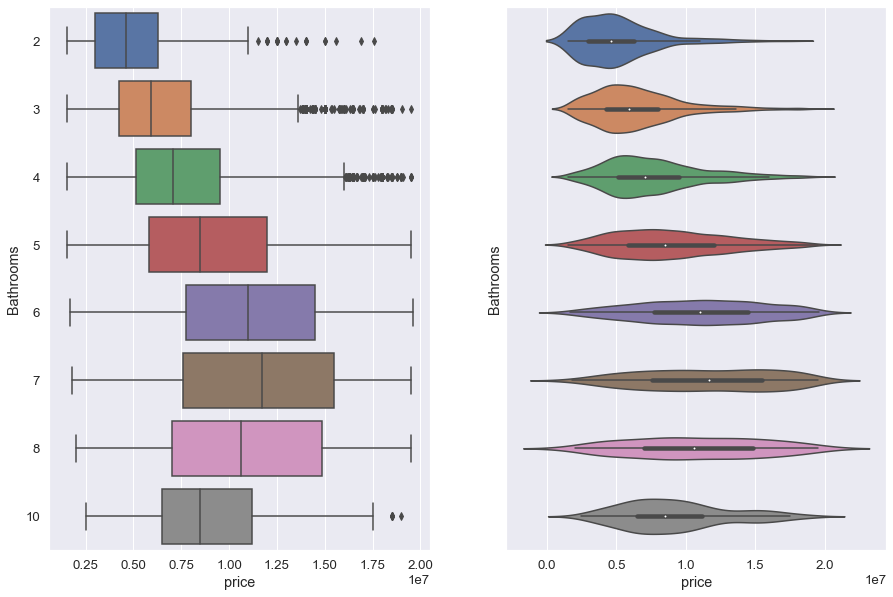

               Mean    Median
Bathrooms                    
2           5107993   4600000
3           6445930   5900000
4           7698909   7081500
5           8999585   8500000
6          11044137  11000000
7          11528197  11697500
8          10787321  10600000
10          9250462   8500000


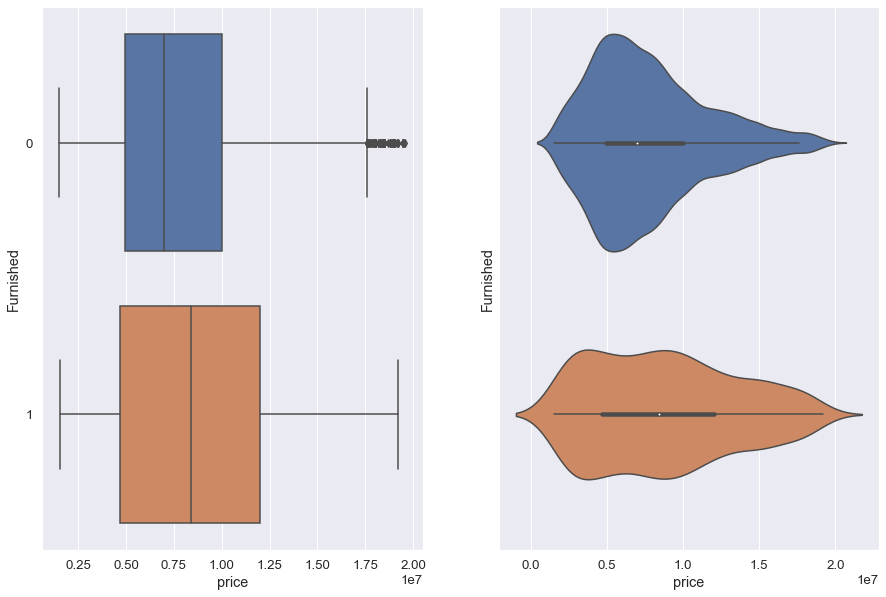

              Mean   Median
Furnished                  
0          7733113  7000000
1          8786236  8400000


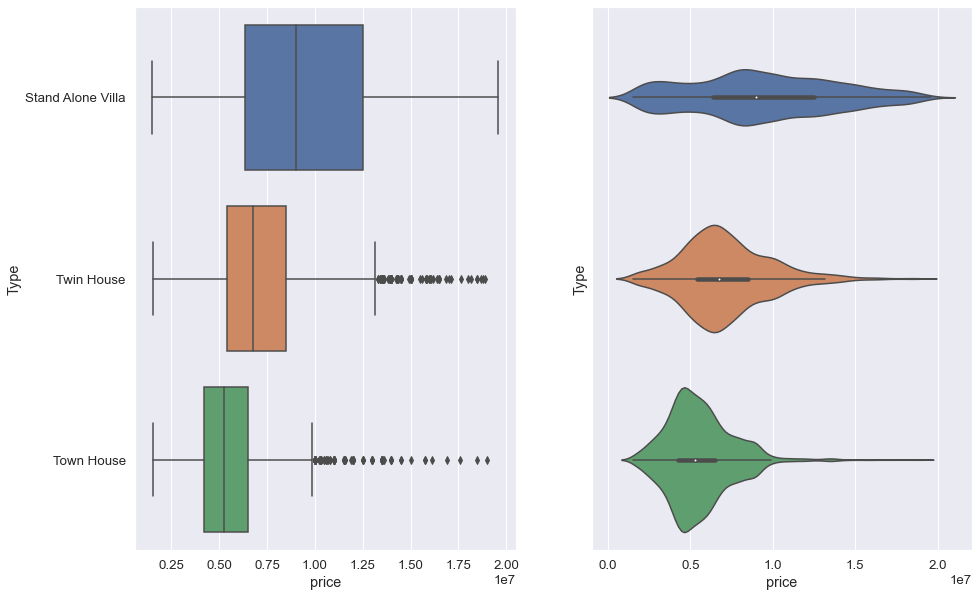

                      Mean   Median
Type                               
Stand Alone Villa  9416358  9000000
Town House         5536307  5251025
Twin House         7102322  6750000


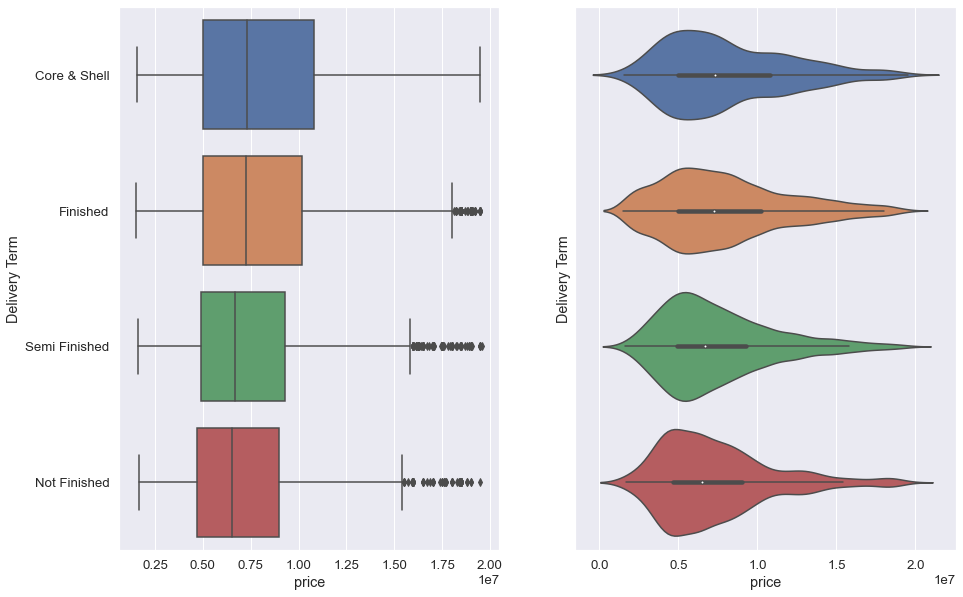

                  Mean   Median
Delivery Term                  
Core & Shell   8058554  7292943
Finished       7935078  7250000
Not Finished   7335193  6500000
Semi Finished  7482914  6700000


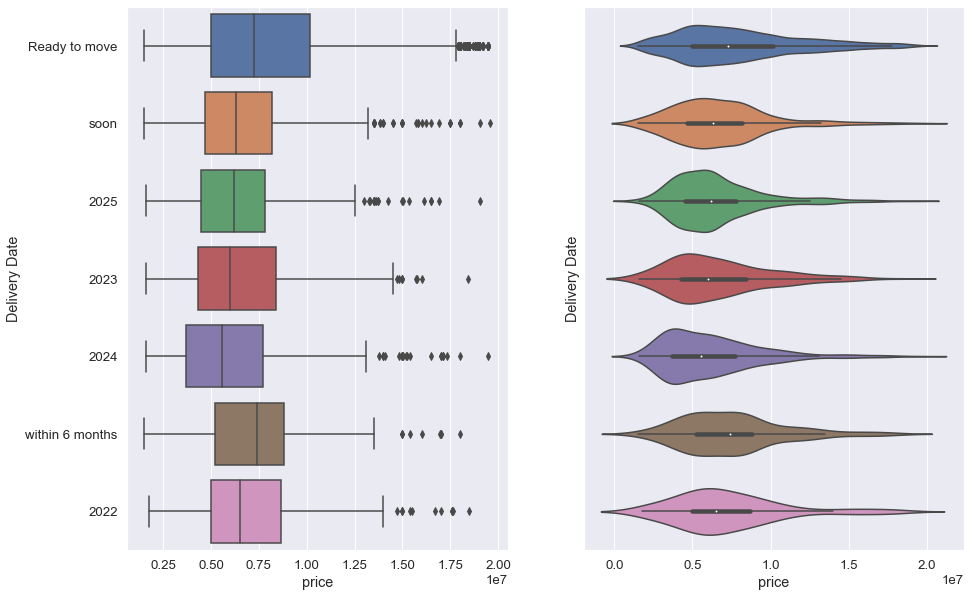

                    Mean   Median
Delivery Date                    
2022             7277376  6500000
2023             6680134  6000000
2024             6184393  5555993
2025             6478150  6200000
Ready to move    7959023  7250000
soon             6708929  6317000
within 6 months  7498888  7400000


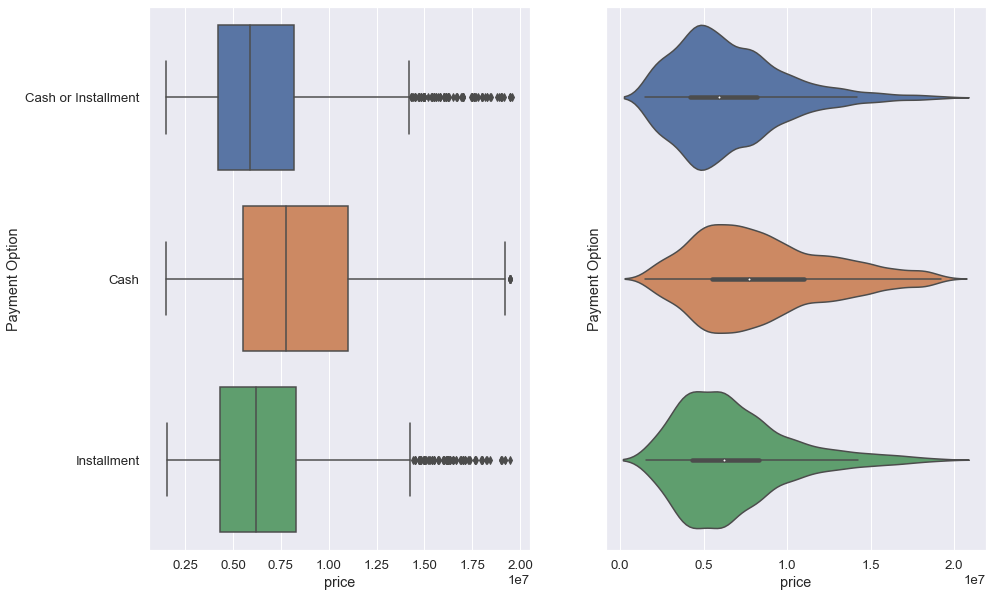

                        Mean   Median
Payment Option                       
Cash                 8463888  7750000
Cash or Installment  6551934  5900000
Installment          6748640  6200000


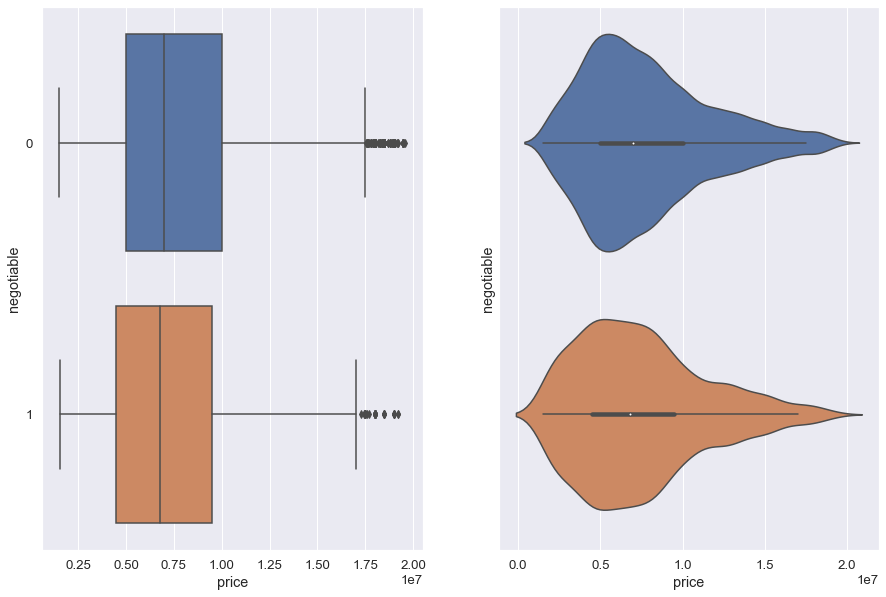

               Mean   Median
negotiable                  
0           7830581  7000000
1           7436109  6800000


In [63]:
for column_name in catgorical_columns:

    print('=' * 80)
    
    x = 'price'
    
    fig, axs = plt.subplots(1, 2, sharey = True)
    sns.boxplot(data = df, x = x, y = column_name, ax = axs[0])
    sns.violinplot(data = df, x = x, y = column_name, ax = axs[1])
    plt.show()
    
    means = df.groupby(column_name)[x].mean()
    medians = df.groupby(column_name)[x].median()

    statsicates = pd.DataFrame()
    statsicates['Mean'] = means
    statsicates['Median'] = medians
    statsicates[['Mean', 'Median']] = statsicates[['Mean', 'Median']].astype(int)
    print(statsicates)

>- in this graph i display the Area ,price and the Payment Option for each category in type 

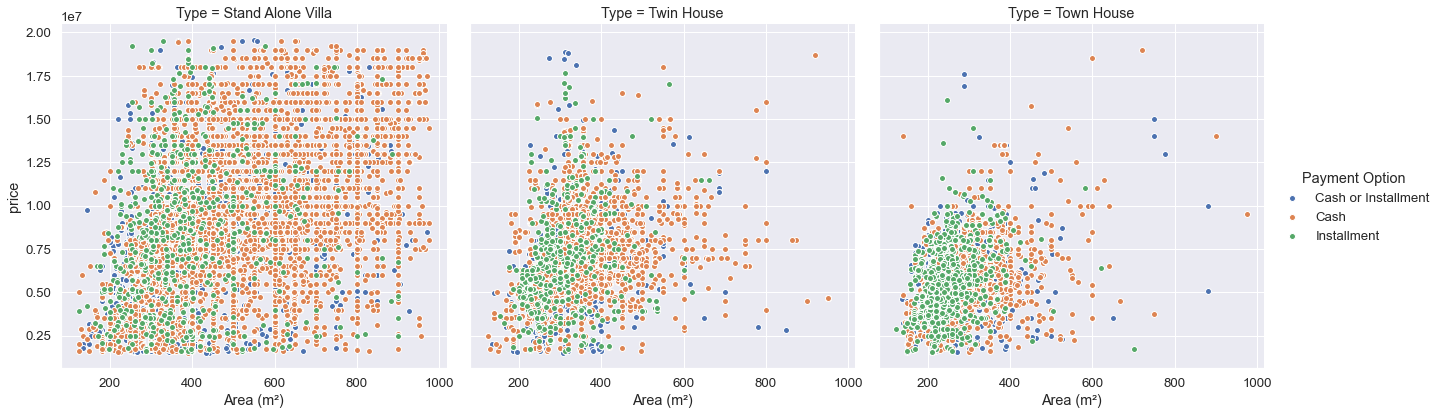

In [64]:
sns.FacetGrid(df, col ="Type",  hue ="Payment Option",height=6).map(plt.scatter,"Area (m²)",  "price", edgecolor ="w").add_legend()

> is the Type Payment Option effect on the area
>> and from this grapgh i figer_out
    

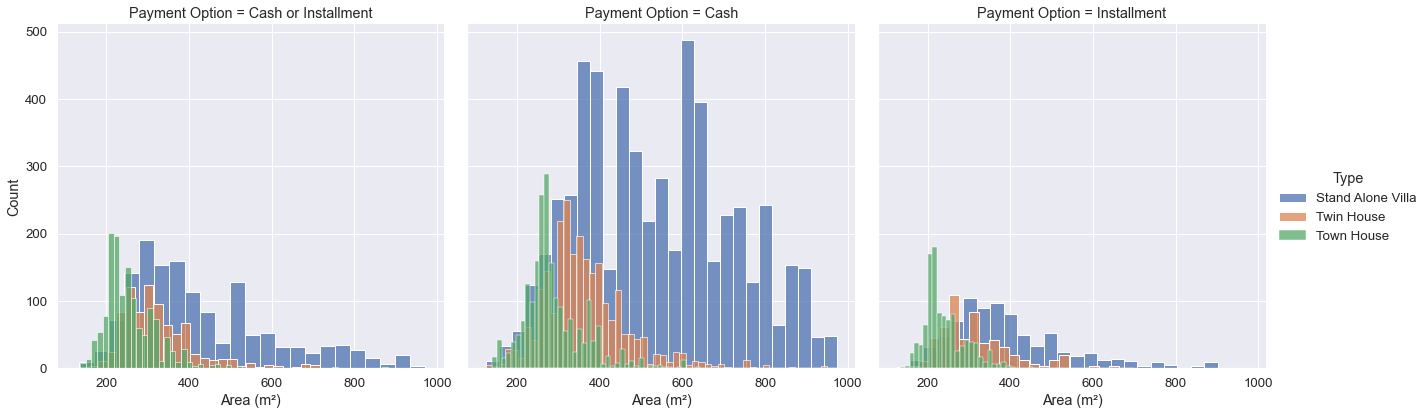

In [65]:
sns.FacetGrid(df, hue="Type", col="Payment Option",height=6).map_dataframe(sns.histplot, x="Area (m²)").add_legend()

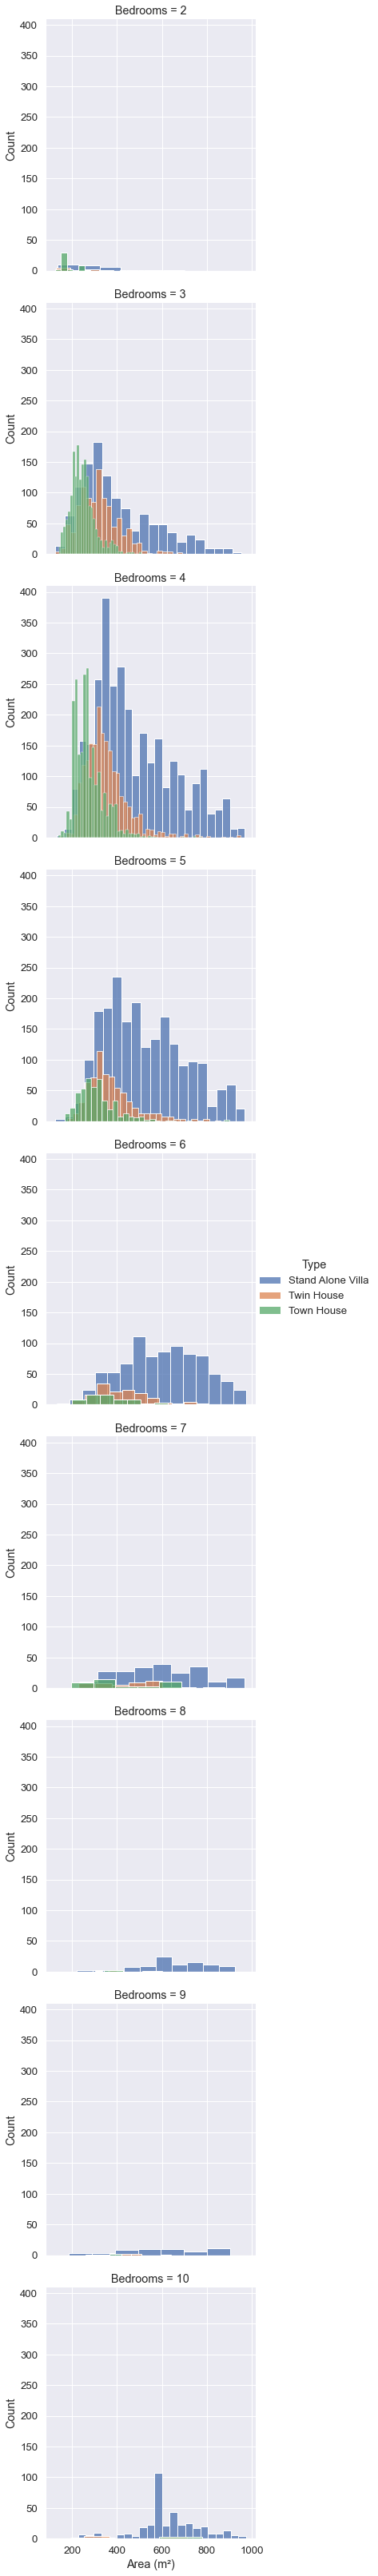

In [66]:
sns.FacetGrid(df, hue="Type", row="Bedrooms",height=5).map_dataframe(sns.histplot, x="Area (m²)").add_legend()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16458 entries, 0 to 16457
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           16458 non-null  int64         
 1   location        16458 non-null  object        
 2   date            16458 non-null  datetime64[ns]
 3   viwers          16458 non-null  int32         
 4   negotiable      16458 non-null  category      
 5   Bedrooms        16458 non-null  category      
 6   Bathrooms       16458 non-null  category      
 7   Area (m²)       16458 non-null  int32         
 8   Type            16458 non-null  object        
 9   Payment Option  16458 non-null  object        
 10  Compound        16458 non-null  object        
 11  Delivery Term   16458 non-null  object        
 12  Amenities       11896 non-null  object        
 13  Furnished       16458 non-null  category      
 14  Delivery Date   16458 non-null  object        
 15  mo

<AxesSubplot:xlabel='Delivery Term', ylabel='Type'>

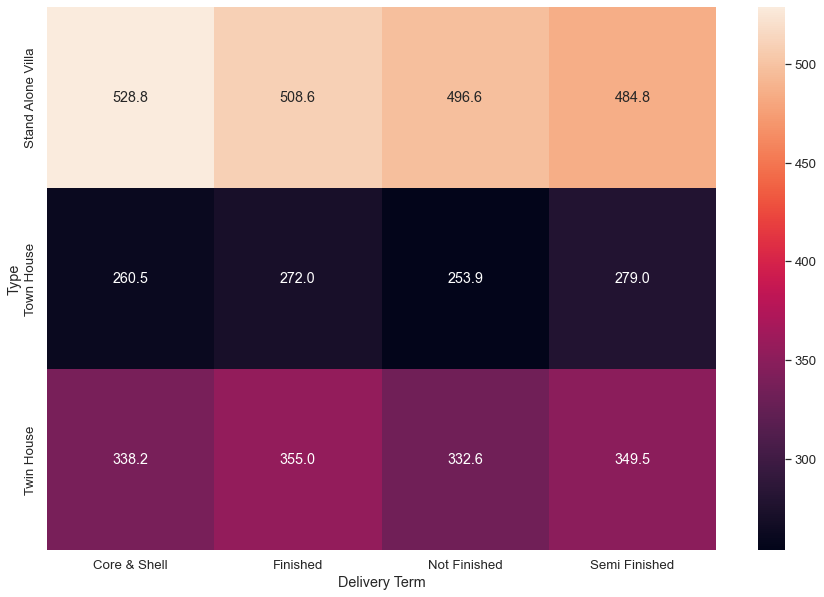

In [68]:
g=df.pivot_table(index='Type', columns='Delivery Term', values='Area (m²)')
sns.heatmap(g, annot=True, fmt=".1f")

<AxesSubplot:xlabel='Bathrooms', ylabel='Bedrooms'>

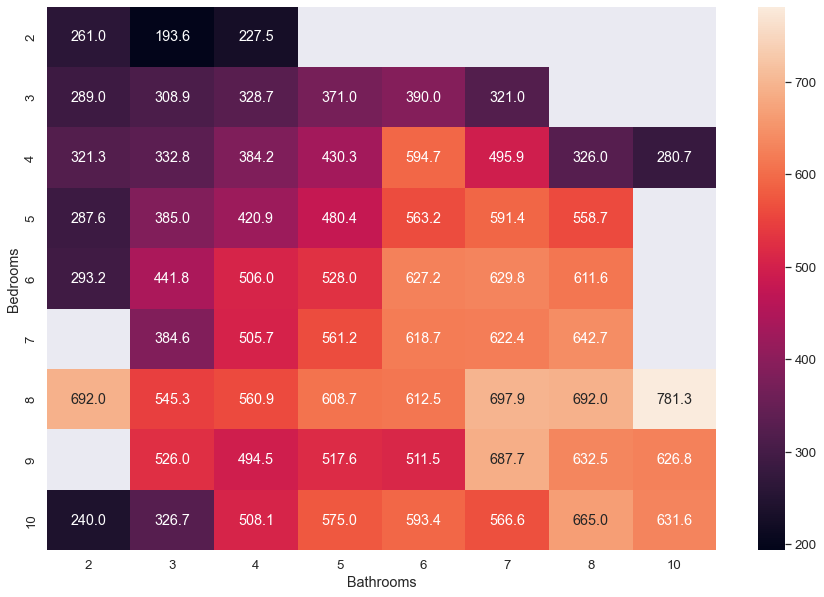

In [69]:
g=df.pivot_table(index='Bedrooms', columns='Bathrooms', values='Area (m²)')
sns.heatmap(g, annot=True, fmt=".1f")

>from these graphs I finger out <br>
>- the average price of unnegotiable prices  is higher than negotiable prices so it is the most common convention between the seller and buyer<br>
>- and as all of us prefer in payment options when u a seller is to take all your money all at once so the average price of the cash category is the height <br> 
>- the most use of the OLX is real seller to avoid the fees of house broker<br>
>- and many companies offer only instrumental payment option and that gives us probity this project Not completed yet and I don’t recommend this type of online sellers <br>
>- as we see in the Delivery date column the ready to move has the most average price because it’s a villa so it u will have summer watermelon in your tummy when u will buy the property<br>
>- the average price of the finished category is the height because the finishing process has been done<br>
>- the average price of Furnished (on the key) category is the heights because it ready to move on it without any afford<br> 

>- if u someones whose work real estate investment or broker   


<AxesSubplot:xlabel='price'>

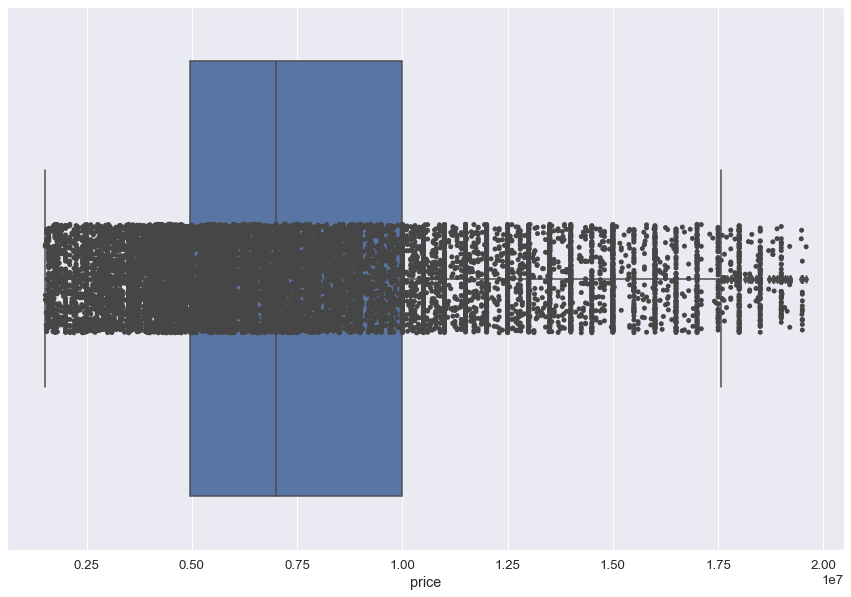

In [70]:
sns.boxplot(x='price', data=df)
sns.stripplot(x='price', data=df, color="#474646")

c:\Users\Moham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


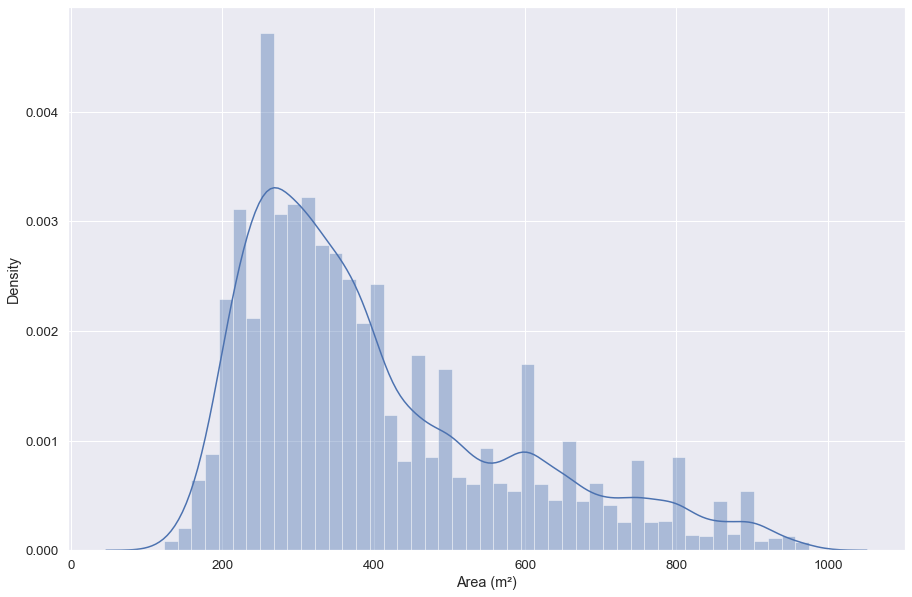

In [71]:
ax = sns.distplot(df["Area (m²)"])


c:\Users\Moham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


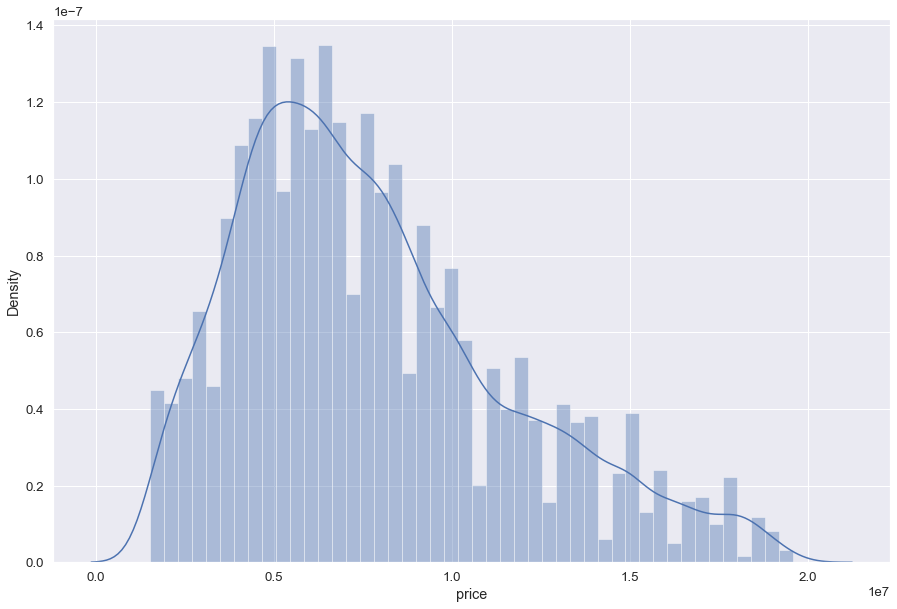

In [72]:
ax = sns.distplot(df["price"])


In [73]:
df['Bedrooms']=df['Bedrooms'].astype('int')
df['Bathrooms']=df['Bathrooms'].astype('int')

In [74]:
df.reset_index(drop=True,inplace=True)

In [75]:
# xxx={1:3,
#  2:3,
#  8:7}
# for k,v in xxx.items():
#     df['Bedrooms']=df['Bedrooms'].replace(k,v)
# xxx={1:3,
#  2:3,
#  8:7,
#  7:6}
# for k,v in xxx.items():
#     df['Bathrooms']=df['Bathrooms'].replace(k,v)

In [76]:
for i in ['Bathrooms','Bedrooms']:
    df[i]=df[i].astype(int)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
# data=pd.get_dummies(df, columns = ['location','Type', 'Payment Option','Compound','Delivery Term','Delivery Date'], drop_first = True)

In [79]:
x=df.drop(['price','viwers','date','negotiable','month','Amenities'],axis=1)
y = df['price']

In [80]:
def transform_d(data, column_name, categories, is_ordinal = False, asserted = True):
    
    df = data.copy(deep = True)
    
    if asserted:
        assert df[column_name].apply(lambda x: x in categories).all()
    
    column_series = df[column_name]
    df.drop(column_name, axis = 1, inplace = True)
    
    if is_ordinal:

        d = {x : i + 1 for i, x in enumerate(categories)}
        column_series.replace(d, inplace = True)
        
        df[column_name] = column_series
    
    else:
        
        columns = [f'{column_name}: {x}' for x in categories]
        temp_df = column_series.apply(lambda x: pd.Series([int(y == x) for y in categories]))
        temp_df.columns = columns
        
        df = df.join(temp_df)
        
    return df
        
        
def transform_c(data, column_name):
    
    df = data.copy(deep = True)
    
    column_series = df[column_name]
    df.drop(column_name, axis = 1, inplace = True)
    df[column_name] = column_series
    
    return df
    
    
def transform(data, column_name, categories = None, is_ordinal = False, asserted = True):

    if categories is None:
        
        return transform_c(data, column_name)
        
    return transform_d(data, column_name, categories, is_ordinal, asserted)
    

def transform_features(X_df):    
    #Column: manufacturer
    
    categories = ['Sheikh Zayed، Giza', 'Rehab City، Cairo', 'New Cairo - El Tagamoa, Cairo', 'Shorouk City، Cairo', 'Madinaty، Cairo', 'New Cairo - El Tagamoa، Cairo', '6th of October، Giza', 'Madinaty, Cairo', 'Mokattam, Cairo', '6th of October, Giza', 'Sheikh Zayed, Giza', 'Dokki، Giza', 'New Capital City، Cairo', 'Mostakbal City، Cairo', 'North Coast، Matruh', 'Heliopolis، Cairo', 'Borg al-Arab، Alexandria', 'Mokattam، Cairo', 'Zohour District، Port Said', 'Rehab City, Cairo', 'Hadayek al-Ahram، Giza', 'Obour City، Cairo', 'Borg al-Arab, Alexandria', 'Hurghada, Red Sea', 'Maadi، Cairo', 'Hadayek 6th of October، Giza', 'Ain Sukhna، Suez', 'Hurghada، Red Sea', 'New Damietta، Damietta', 'Ismailia City، Ismailia', 'Giza District، Giza', 'Haram، Giza', 'Agami، Alexandria', '10th of Ramadan، Sharqia', 'New Heliopolis، Cairo', 'Shorouk City, Cairo', 'West Somid، Giza', 'Alamein، Matruh', 'Sharm al-Sheikh، South Sinai', 'North Coast, Matruh', 'Nasr City، Cairo', 'Badr City، Cairo', 'New Capital City, Cairo', 'Downtown Cairo، Cairo', 'Ain Shams، Cairo', 'Mostakbal City, Cairo', 'New Minya، Minya', 'Marsa Matrouh، Matruh', 'Mansuriyya، Giza', 'Kafr Abdo، Alexandria', 'Tersa، Giza', 'Abu Talat، Alexandria', 'Ras Sedr، South Sinai', '15 May City، Cairo', 'Helmeyat El Zaytoun، Cairo', 'Mansura، Dakahlia', 'Heliopolis, Cairo', 'Maadi, Cairo', 'Zahraa Al Maadi، Cairo', 'Ain Sukhna, Suez', 'Nasr City, Cairo', 'Obour City, Cairo']
    

    
    df = transform(data = X_df,
                   column_name = 'location', 
                   categories = categories, 
                   is_ordinal = False,
                   asserted = False)
    
    ############################################
    
    #Column: condition
    # drop_first=flase 
    df = transform(data = df, 
                   column_name = 'Type', 
                   categories = ['Twin House', 'Town House'], 
                   is_ordinal = False,
                   asserted = False)
    
    ############################################
    
    #Column: cylinders
    
    df = transform(data = df, 
                   column_name = 'Payment Option', 
                   categories = ['Cash', 'Installment'], 
                   is_ordinal = False,
                   asserted = False)
    
    ############################################
    
    #Column: fuel
    
    categories = ['Lake West', 'not_in_Compound', 'Hyde Park New Cairo', 'Al Rabwa', 'Rehab City', 'EL Patio Prime', 'Madinaty', 'Village West', 'Beverly Hills', 'Villette', 'Swan Lake', 'Sun Capital', 'Zizinia Gardens', 'EL Patio 5', 'Layan', 'Taj City', 'Uptown Cairo', 'EL Patio 6', 'El Karma 4', 'El Patio', 'Mountain View Chillout Park', 'Royal City', 'Mena Garden City', 'Al Yasmine', 'Royal Meadows', 'Sodic Westown', 'El Karma 2', 'Allegria', 'Sama', 'New Giza', 'Midtown Sky', 'Vinci', 'IL Bosco', 'Blue Vert', 'Midtown Solo', 'Kayan', 'Jedar', 'Stella Compounds', 'Badya Palm Hills', 'Etapa', 'Mountain View iCity', 'Azzar', 'O West', 'Etoile de Ville', 'Sarai', 'Maxim Country Club', 'Palm Hills Katameya', 'Palm Hills Katameya Extension', 'Dyar', 'Moon Hillls', 'La Vida', 'The Square', 'Grand Residence', 'Katameya Breeze', 'Al Diyar', 'Joulz', 'Palm hills golf extension', 'Cairo Festival City', 'Villino', 'El Karma', 'Mivida', 'EL Patio ORO', 'Palm hills golf views', 'Kattameya Residence', 'Al Burouj', 'Les Rois', 'Tawny', 'Atrio', 'Eastown', 'La Vista City', 'Kattameya Gardens', '2020 Compound', 'Marina City', 'The Crown', 'EL Patio Casa', 'Rayos', 'Porto October', 'Alma', 'Sodic East', 'Mountain View - October Park', 'Zayed 2000', 'Concord Gardens', 'Cleopatra Palace', 'Gardenia', 'Dreamland', 'De Joya', 'Palm Parks', 'Silva', 'Mountain View 2', 'Ourika', 'Aswar', 'Trio Gardens', 'Grand Heights', 'Belle Vie', 'Keeva', 'Palm Hills New Cairo', 'El Reef El Orouby', 'Bloomfields', 'Fountain Park', 'VGK', 'Karma Residence', 'Zayed Dunes', 'Pyramids Walk', 'Monte Napoleon', 'Cleopatra Square', 'Leena Springs', 'Bellagio', 'Fifth Square', 'Golden Heights', 'Zed East', 'River Walk', 'Casa Verde', 'Moon Valley', 'La Rose', 'Meadows Park', 'Jeera', 'Palm Valley', 'Al Maqsad', 'Green 4', 'Nakheel', 'Bamboo Palm Hills', 'Greens', 'Hadaba', 'The Estates', 'Mountain View 1', 'The MarQ', 'Not in Compound', 'Divina Gardens', 'Creek Town', 'District 5 Compound', 'Stone Park', 'Mountain View Hyde Park', 'La Terra', 'Cairo Gate', 'Rock Ville', 'Katameya Dunes', 'Emerald Park', 'May Fair', 'Lake View', 'Hayah Residence', 'Fleur De Ville', 'IL Bosco City', 'Zayed Regency', 'Al Solaimaneyah Golf City', 'Woodville', 'Gardenia Springs', 'Katameya Hills', 'Concordia', 'Villar Residence', 'L’Avenir', 'EL Patio 2', 'La Verde', 'Green Square', 'Seasons', 'Katameya Heights']
    
    df = transform(data = df, 
                   column_name = 'Compound', 
                   categories = categories,
                   is_ordinal = False,
                   asserted = False)
    

    
    df = transform(data = df, 
                   column_name = 'Delivery Term', 
                   categories = ['Finished', 'Semi Finished', 'Not Finished'],
                   is_ordinal = False,
                   asserted = False)
    
    
    ############################################
    
        
    df = transform(data = df, 
                   column_name = 'Delivery Date', 
                   categories = ['Ready to move', 'soon', '2025', '2023', '2024', 'within 6 months', '2022'],
                   is_ordinal = False,
                   asserted = False)
    
    return df

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16458 entries, 0 to 16457
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           16458 non-null  int64         
 1   location        16458 non-null  object        
 2   date            16458 non-null  datetime64[ns]
 3   viwers          16458 non-null  int32         
 4   negotiable      16458 non-null  category      
 5   Bedrooms        16458 non-null  int32         
 6   Bathrooms       16458 non-null  int32         
 7   Area (m²)       16458 non-null  int32         
 8   Type            16458 non-null  object        
 9   Payment Option  16458 non-null  object        
 10  Compound        16458 non-null  object        
 11  Delivery Term   16458 non-null  object        
 12  Amenities       11896 non-null  object        
 13  Furnished       16458 non-null  category      
 14  Delivery Date   16458 non-null  object        
 15  mo

In [82]:
x=transform_features(df.drop(['price','viwers','date','negotiable','month','Amenities'],axis=1))
y=df['price']

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [85]:
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model =  RandomForestRegressor(n_estimators=100,max_depth=60)


model.fit(x_train, y_train)
y_pred = model.predict(x_test)
yt_pred = model.predict(x_train)

print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Testing MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'Testing R2: {r2_score(y_test, y_pred)}')

Testing RMSE: 106151.07176207488
Testing MAE: 46739.020065738216
Testing R2: 0.9992356648917862


In [86]:
joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

In [87]:
df

,price,location,date,viwers,negotiable,Bedrooms,Bathrooms,Area (m²),Type,Payment Option,...,Security,Water,Elevator,Pool,Pets,Kitchen,Maids,Electricity,Garden,Balcony
0,7400000,Sheikh Zayed، Giza,2022-03-09,54,0,4,4,338,Stand Alone Villa,Cash or Installment,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7700000,Rehab City، Cairo,2022-03-01,291,0,3,3,456,Stand Alone Villa,Cash,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
2,6500000,"New Cairo - El Tagamoa, Cairo",2022-03-10,67,0,4,4,255,Twin House,Cash,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,12000000,Sheikh Zayed، Giza,2022-02-27,165,0,4,3,800,Stand Alone Villa,Cash,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,11000000,Rehab City، Cairo,2022-02-28,159,1,5,3,530,Stand Alone Villa,Cash,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16453,6200000,New Cairo - El Tagamoa، Cairo,2022-01-23,10,0,4,4,300,Twin House,Installment,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
16454,15380000,"New Cairo - El Tagamoa, Cairo",2022-01-23,12,0,5,5,630,Stand Alone Villa,Cash,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
16455,5500000,"Sheikh Zayed, Giza",2022-01-23,20,0,5,6,250,Town House,Cash,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16456,5500000,"Sheikh Zayed, Giza",2022-01-23,13,0,5,6,250,Town House,Cash,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
{'location': 'Rehab City، Cairo',
 'Bedrooms': 3,
 'Bathrooms': 3,
 'Area (m²)': 456,
 'Type': 'Stand Alone Villa',
 'Payment Option': 'Cash',
 'Compound': 'not_in_Compound',
 'Delivery Term': 'Finished',
 'Furnished': 0,
 'Delivery Date': 'Ready to move',
 'meter_price': 16885.96,
 'Parking': 0.0,
 'Landline': 1.0,
 'Covered': 0.0,
 'A/C': 0.0,
 'Gas': 1.0,
 'Security': 1.0,
 'Natural': 1.0,
 'Water': 1.0,
 'Elevator': 0.0,
 'Pool': 0.0,
 'Pets': 1.0,
 'Kitchen': 0.0,
 'Maids': 0.0,
 'Electricity': 1.0,
 'Garden': 1.0,
 'Balcony': 1.0}

{'location': 'Rehab City، Cairo',
 'Bedrooms': 3,
 'Bathrooms': 3,
 'Area (m²)': 456,
 'Type': 'Stand Alone Villa',
 'Payment Option': 'Cash',
 'Compound': 'not_in_Compound',
 'Delivery Term': 'Finished',
 'Furnished': 0,
 'Delivery Date': 'Ready to move',
 'meter_price': 16885.96,
 'Parking': 0.0,
 'Landline': 1.0,
 'Covered': 0.0,
 'A/C': 0.0,
 'Gas': 1.0,
 'Security': 1.0,
 'Natural': 1.0,
 'Water': 1.0,
 'Elevator': 0.0,
 'Pool': 0.0,
 'Pets': 1.0,
 'Kitchen': 0.0,
 'Maids': 0.0,
 'Electricity': 1.0,
 'Garden': 1.0,
 'Balcony': 1.0}